# Passes location

## Importing libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Arc
import seaborn as sns
%matplotlib inline

In [3]:
pip install mplsoccer

In [4]:
pip inst
all statsbombpy

### Let import statsbomb dataset :


In [5]:
from statsbombpy import sb

In [6]:
# let's check all the competitions of our Dataset
sb.competitions().head(5)

C:\Users\anass.harbouli\Anaconda3\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
0,16,4,Europe,Champions League,male,False,False,2018/2019,2022-12-01T11:42:34.874323,2021-06-13T16:17:31.694,None,2022-12-01T11:42:34.874323
1,16,1,Europe,Champions League,male,False,False,2017/2018,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2021-01-23T21:55:30.425330
2,16,2,Europe,Champions League,male,False,False,2016/2017,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
3,16,27,Europe,Champions League,male,False,False,2015/2016,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00
4,16,26,Europe,Champions League,male,False,False,2014/2015,2021-08-27T11:26:39.802832,2021-06-13T16:17:31.694,None,2020-07-29T05:00


In [7]:
# Let's take the 2010-2011 champoins league final match:
sb.matches(16,22)

C:\Users\anass.harbouli\Anaconda3\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,match_id,match_date,kick_off,competition,season,home_team,away_team,home_score,away_score,match_status,...,last_updated_360,match_week,competition_stage,stadium,referee,home_managers,away_managers,data_version,shot_fidelity_version,xy_fidelity_version
0,18236,2011-05-28,20:45:00.000,Europe - Champions League,2010/2011,Barcelona,Manchester United,3,1,available,...,2021-06-13T16:17:31.694,1,Final,Wembley Stadium,Viktor Kassai,Josep Guardiola i Sala,Alex Ferguson,1.0.3,None,None


In [8]:
# the match events :
bar_vs_manu = sb.events(18236)
bar_vs_manu.sample(5)

C:\Users\anass.harbouli\Anaconda3\lib\site-packages\statsbombpy\api_client.py:21: NoAuthWarning: credentials were not supplied. open data access only
  warnings.warn(


,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
2777,NaN,NaN,NaN,NaN,NaN,"[41.0, 60.0]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:26:03.937,Carry,NaN
3807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:30:13.230,Pressure,NaN
3973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:18:19.330,Ball Recovery,NaN
2901,NaN,NaN,NaN,NaN,NaN,"[75.0, 13.0]",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:37:47.200,Carry,NaN
2316,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Manchester United,00:43:13.847,Ball Receipt*,NaN


In [9]:
# check dataframe columns:
bar_vs_manu.columns

Index(['bad_behaviour_card', 'ball_receipt_outcome', 'ball_recovery_offensive',
       'ball_recovery_recovery_failure', 'block_save_block',
       'carry_end_location', 'clearance_aerial_won', 'counterpress',
       'dribble_outcome', 'dribble_overrun', 'duel_outcome', 'duel_type',
       'duration', 'foul_committed_advantage', 'foul_committed_card',
       'foul_committed_type', 'foul_won_advantage', 'foul_won_defensive',
       'goalkeeper_body_part', 'goalkeeper_end_location', 'goalkeeper_outcome',
       'goalkeeper_position', 'goalkeeper_technique', 'goalkeeper_type', 'id',
       'index', 'interception_outcome', 'location', 'match_id', 'minute',
       'off_camera', 'pass_aerial_won', 'pass_angle', 'pass_assisted_shot_id',
       'pass_backheel', 'pass_body_part', 'pass_cross', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pass_type',
       'period', 'play_pattern', 'pla

### Let's explor some Stats in this match:

#### Looking for number of passes made by two teams:

In [10]:
number_passes = bar_vs_manu['type'].value_counts()['Pass']
number_passes

1222

#### Looking for number of passes made by Barcelona:

In [11]:
match_id_required = [18236]
team_required = "Barcelona"

In [12]:
# bringing Barcelona event :
Barcelona_events = bar_vs_manu.loc[bar_vs_manu['team'] == team_required]
Barcelona_events

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 41221, 'lineup': [{'player': {'i...",Barcelona,00:00:00.000,Starting XI,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:00.000,Half Start,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:18.726,Pass,NaN
10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:00:20.918,Pass,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Barcelona,00:11:48.134,Offside,NaN
4322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Seydou Kéita,NaN,Barcelona,00:40:12.316,Substitution,NaN
4323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Carles Puyol i Saforcada,NaN,Barcelona,00:42:47.859,Substitution,NaN
4324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Ibrahim Afellay,NaN,Barcelona,00:46:25.794,Substitution,NaN


In [13]:
# number of passes made by barcelona
NumBarcelona_passes = Barcelona_events['type'].value_counts()['Pass']
NumBarcelona_passes

827

In [14]:
filter_passes= Barcelona_events[Barcelona_events['type'] == 'Pass']

In [15]:
df_Pl_grouped = filter_passes.groupby('player')

In [16]:
#Number of passes made by each player
PassByPlayer = df_Pl_grouped['player'].count().sort_values(ascending=False)
PassByPlayer

player
Xavier Hernández Creus             151
Andrés Iniesta Luján               117
Lionel Andrés Messi Cuccittini     104
Sergio Busquets i Burgos            85
Daniel Alves da Silva               82
Eric-Sylvain Bilal Abidal           64
Javier Alejandro Mascherano         62
Gerard Piqué Bernabéu               54
Pedro Eliezer Rodríguez Ledesma     38
David Villa Sánchez                 30
Víctor Valdés Arribas               30
Carles Puyol i Saforcada             6
Seydou Kéita                         3
Ibrahim Afellay                      1
Name: player, dtype: int64

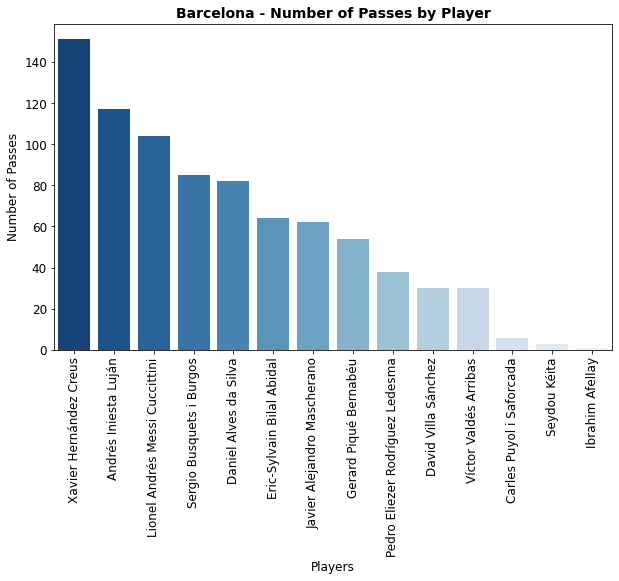

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x=PassByPlayer.index, y=PassByPlayer.values, palette='Blues_r')
plt.xlabel("Players", fontsize=12)
plt.ylabel("Number of Passes", fontsize=12)
plt.title("Barcelona - Number of Passes by Player", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

#### Looking for number of passes made by Man United:

In [18]:
team_required_02 = "Manchester United"

In [19]:
ManUnited_events = bar_vs_manu.loc[bar_vs_manu['team'] == team_required_02]

In [20]:
# Number of passes made by Man United
ManU_passes = ManUnited_events['type'].value_counts()['Pass']
ManU_passes

395

In [21]:
ManU_filter_passes= ManUnited_events[ManUnited_events['type'] == 'Pass']


In [22]:
ManU_df_Pl_grouped = ManU_filter_passes.groupby('player')

In [23]:
#Number of passes made by each Man United player
ManUnited_PassByPlayer = ManU_df_Pl_grouped['player'].count().sort_values(ascending=False)
ManUnited_PassByPlayer

player
Rio Ferdinand                     49
Wayne Mark Rooney                 44
Michael Carrick                   37
Edwin van der Sar                 36
Ryan Giggs                        36
Ji-Sung Park                      34
Nemanja Vidić                     34
Patrice Evra                      32
Luis Antonio Valencia Mosquera    30
Fábio Pereira da Silva            22
Javier Hernández Balcázar         16
Paul Scholes                      15
Luís Carlos Almeida da Cunha      10
Name: player, dtype: int64

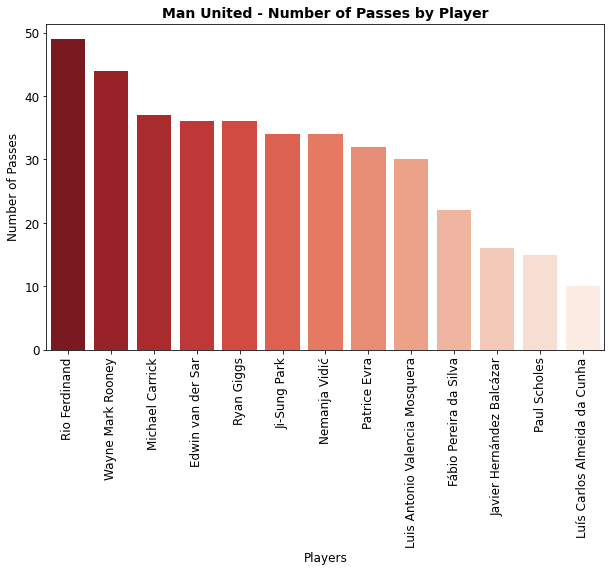

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(x=ManUnited_PassByPlayer.index, y=ManUnited_PassByPlayer.values, palette='Reds_r')
plt.xlabel("Players", fontsize=12)
plt.ylabel("Number of Passes", fontsize=12)
plt.title("Man United - Number of Passes by Player", fontsize=14, fontweight='bold')
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Display number of dangerous passes made by Barcelona

The determine if the passes are dangerous we will take one factor of this time: > The passes that finished with shoot for the next 15 seconds:

In [27]:
for ic, match_id in enumerate(match_id_required):
    # Load in all match events
    team_actions = bar_vs_manu.loc[bar_vs_manu['team'] == team_required]

    # A dataframe of passes
    passes_match = team_actions.loc[team_actions['type'] == 'Pass'].set_index('id')
    
    # A dataframe of shots
    shots_match = team_actions.loc[team_actions['type'] == 'Shot'].set_index('id')
    
    # Find shot times in seconds
    # This should be adjusted to account for overlapping halves of the match.
    shot_times = shots_match['minute'] * 60 + shots_match['second']
    pass_times = passes_match['minute'] * 60 + passes_match['second']
    
    shot_window = 15  
    shot_start = shot_times - shot_window
    
    # Check with passes are within [shot_window] seconds of a shot
    
    def in_range(pass_time, start, finish):
        return (True in ((start < pass_time) & (pass_time < finish)).unique())

    pass_to_shot = pass_times.apply(lambda x: in_range(x, shot_start, shot_times))
    
    # Exclude corners
    iscorner = passes_match['pass_type'] == 'Corner'
    
    Bdanger_passes = passes_match.loc[np.logical_and(pass_to_shot, np.logical_not(iscorner))]
    
    if ic == 0:
        passes = Bdanger_passes
    else:
        passes = passes.append(Bdanger_passes)
    
    print('Match: ' + str(match_id) + ': ' + team_required + ' The Number of dangerous passes that leads to shoot are: ' + str(len(Bdanger_passes)))

Match: 18236: Barcelona The Number of dangerous passes that leads to shoot are: 95


### Display number of dangerous passes made by Man United

In [29]:
for ic, match_id in enumerate(match_id_required):
    # Load in all match events
    team_actions = bar_vs_manu.loc[bar_vs_manu['team'] == team_required_02]

    # A dataframe of passes
    passes_match = team_actions.loc[team_actions['type'] == 'Pass'].set_index('id')
    
    # A dataframe of shots
    shots_match = team_actions.loc[team_actions['type'] == 'Shot'].set_index('id')
    
    # Find shot times in seconds
    # This should be adjusted to account for overlapping halves of the match.
    shot_times = shots_match['minute'] * 60 + shots_match['second']
    pass_times = passes_match['minute'] * 60 + passes_match['second']
    
    shot_window = 15  
    shot_start = shot_times - shot_window
    
    # Check with passes are within [shot_window] seconds of a shot
    
    def in_range(pass_time, start, finish):
        return (True in ((start < pass_time) & (pass_time < finish)).unique())

    pass_to_shot = pass_times.apply(lambda x: in_range(x, shot_start, shot_times))
    
    # Exclude corners
    iscorner = passes_match['pass_type'] == 'Corner'
    
    Mdanger_passes = passes_match.loc[np.logical_and(pass_to_shot, np.logical_not(iscorner))]
    
    if ic == 0:
        passes = Mdanger_passes
    else:
        passes = passes.append(Mdanger_passes)
    
    print('Match: ' + str(match_id) + ': ' + team_required_02 + ' The Number of dangerous passes that leads to shoot are: ' + str(len(Mdanger_passes)))

Match: 18236: Manchester United The Number of dangerous passes that leads to shoot are: 13


### Let's plot the passes location & heat map for Barcelona Team

In [30]:
from mplsoccer import *

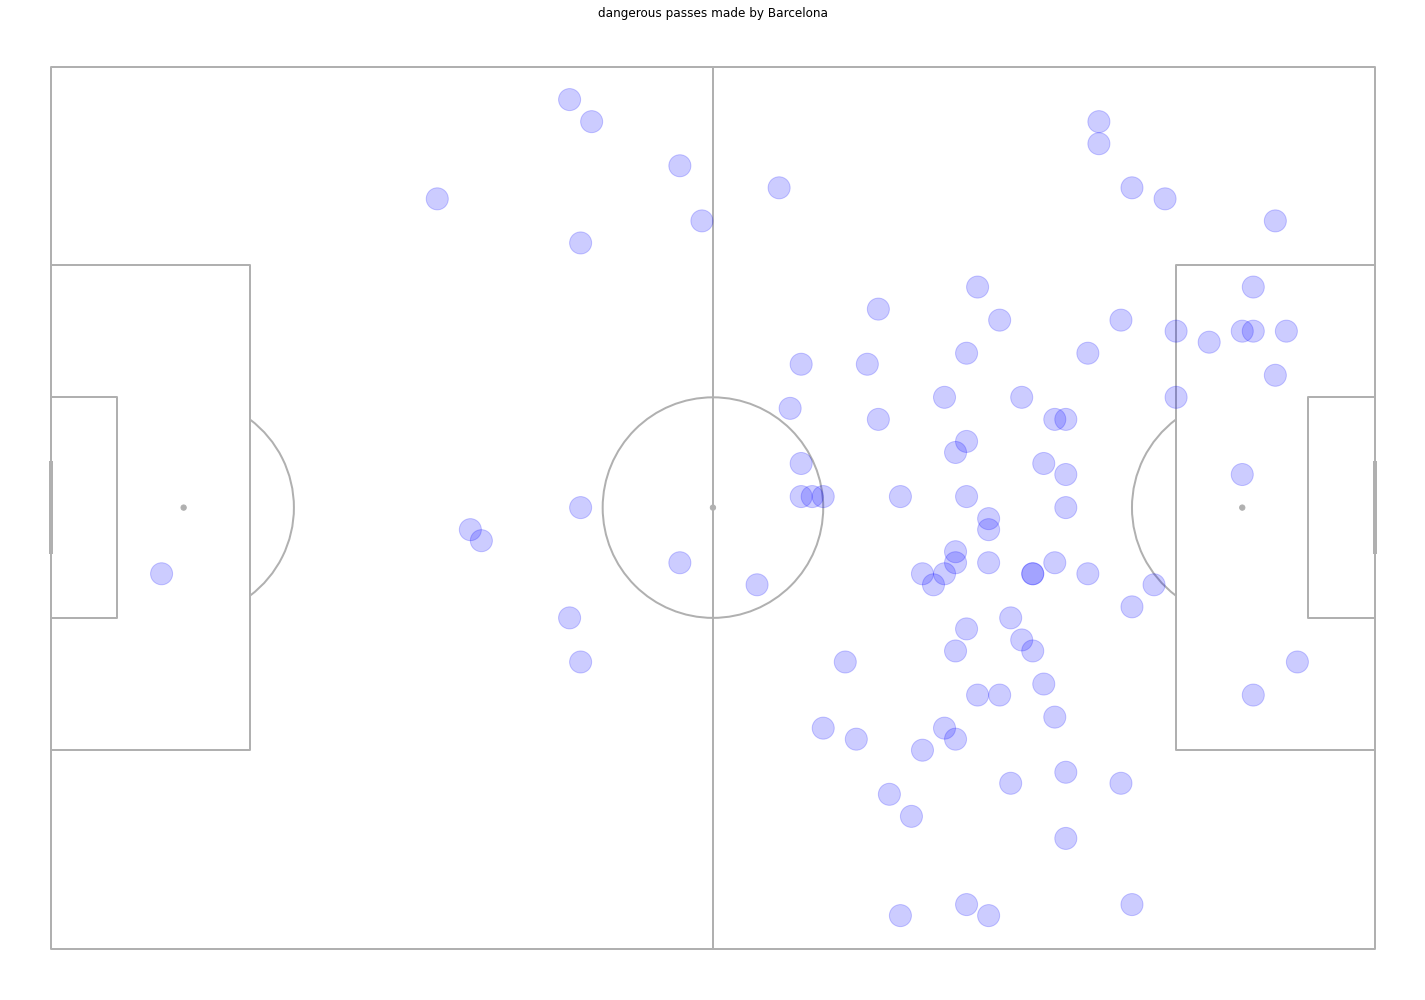

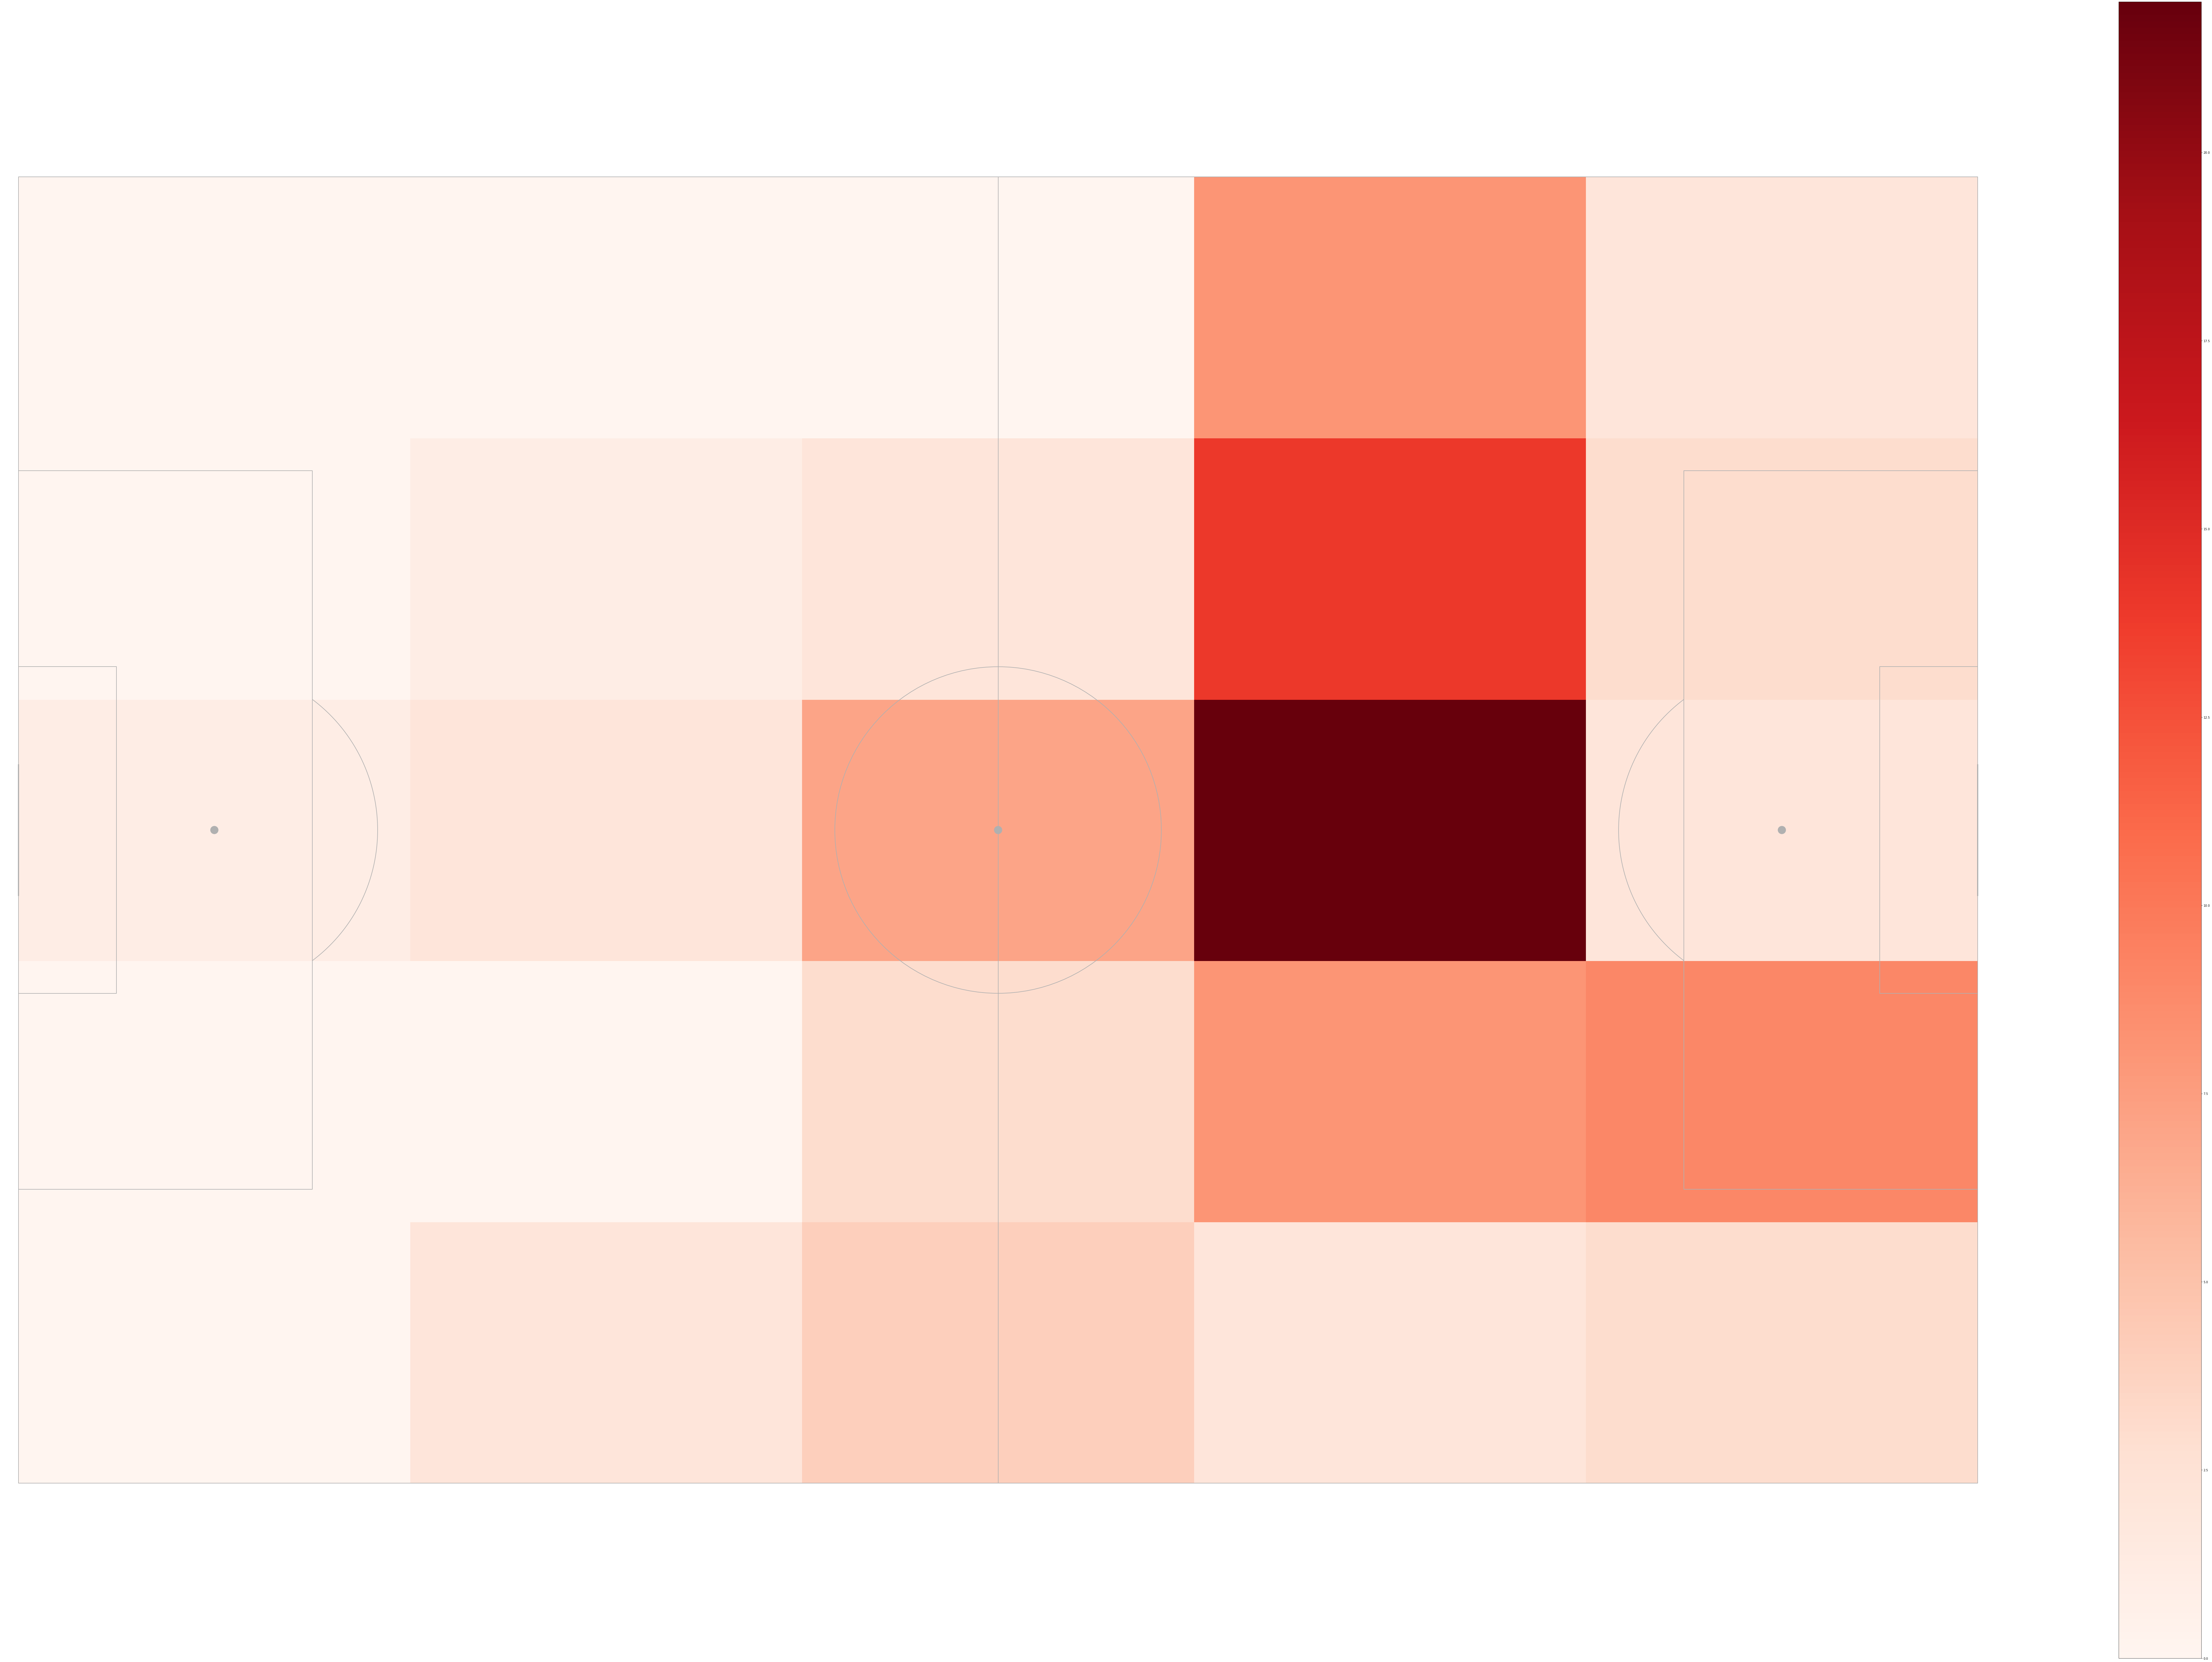

In [31]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthepassthY,'yards','gray')
for i,thepass in Bdanger_passes.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('dangerous passes made by ' + team_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + team_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in Bdanger_passes.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Dangerous passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Let's plot the passes location & heat map for Man United Team

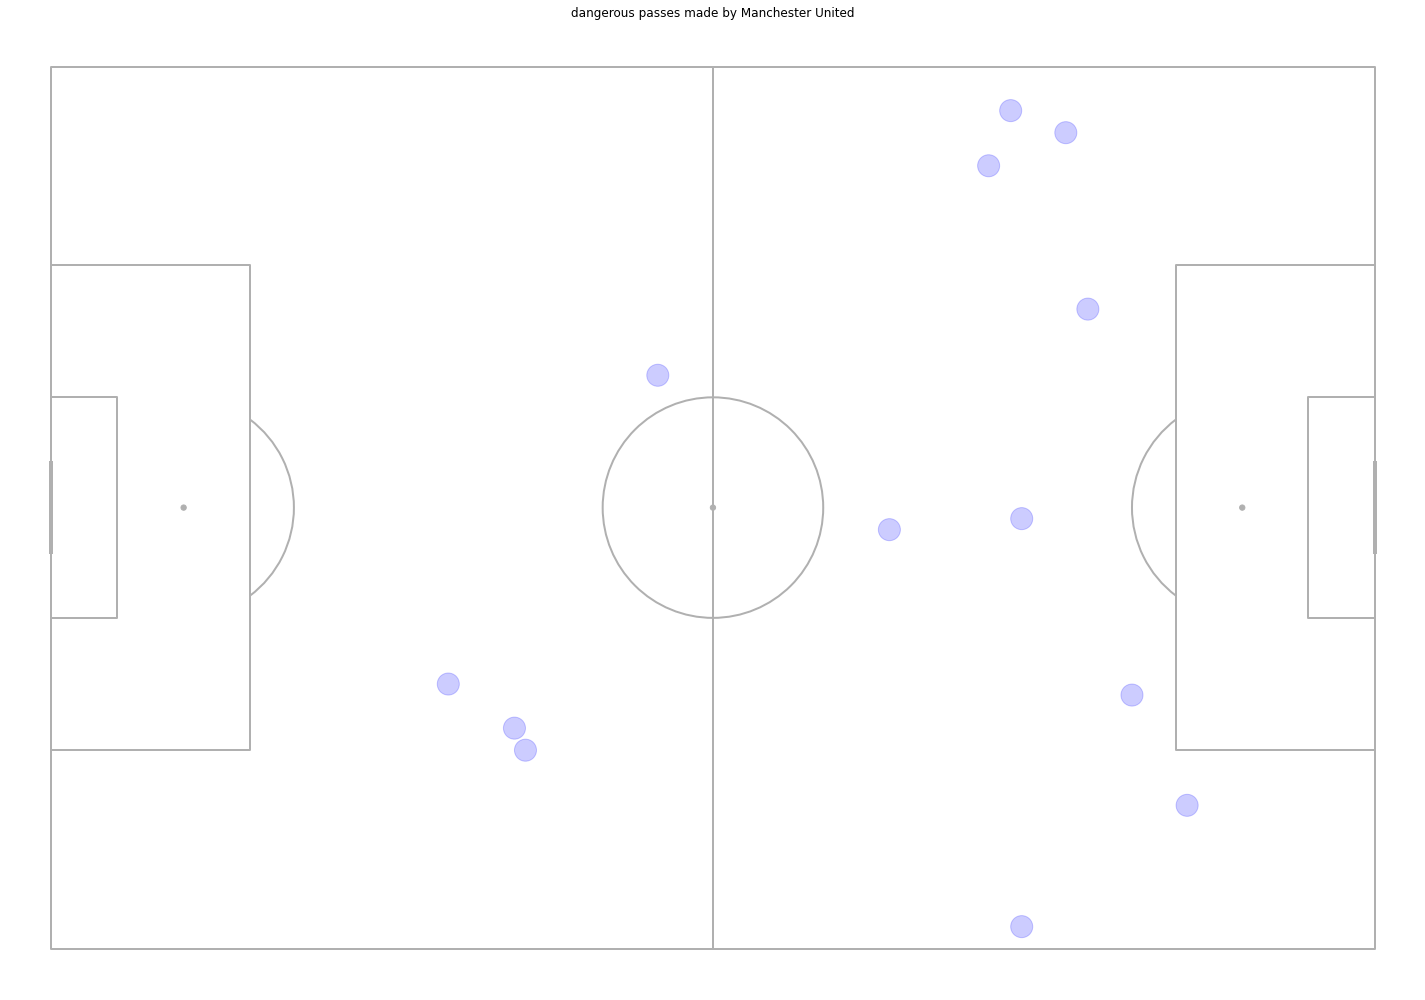

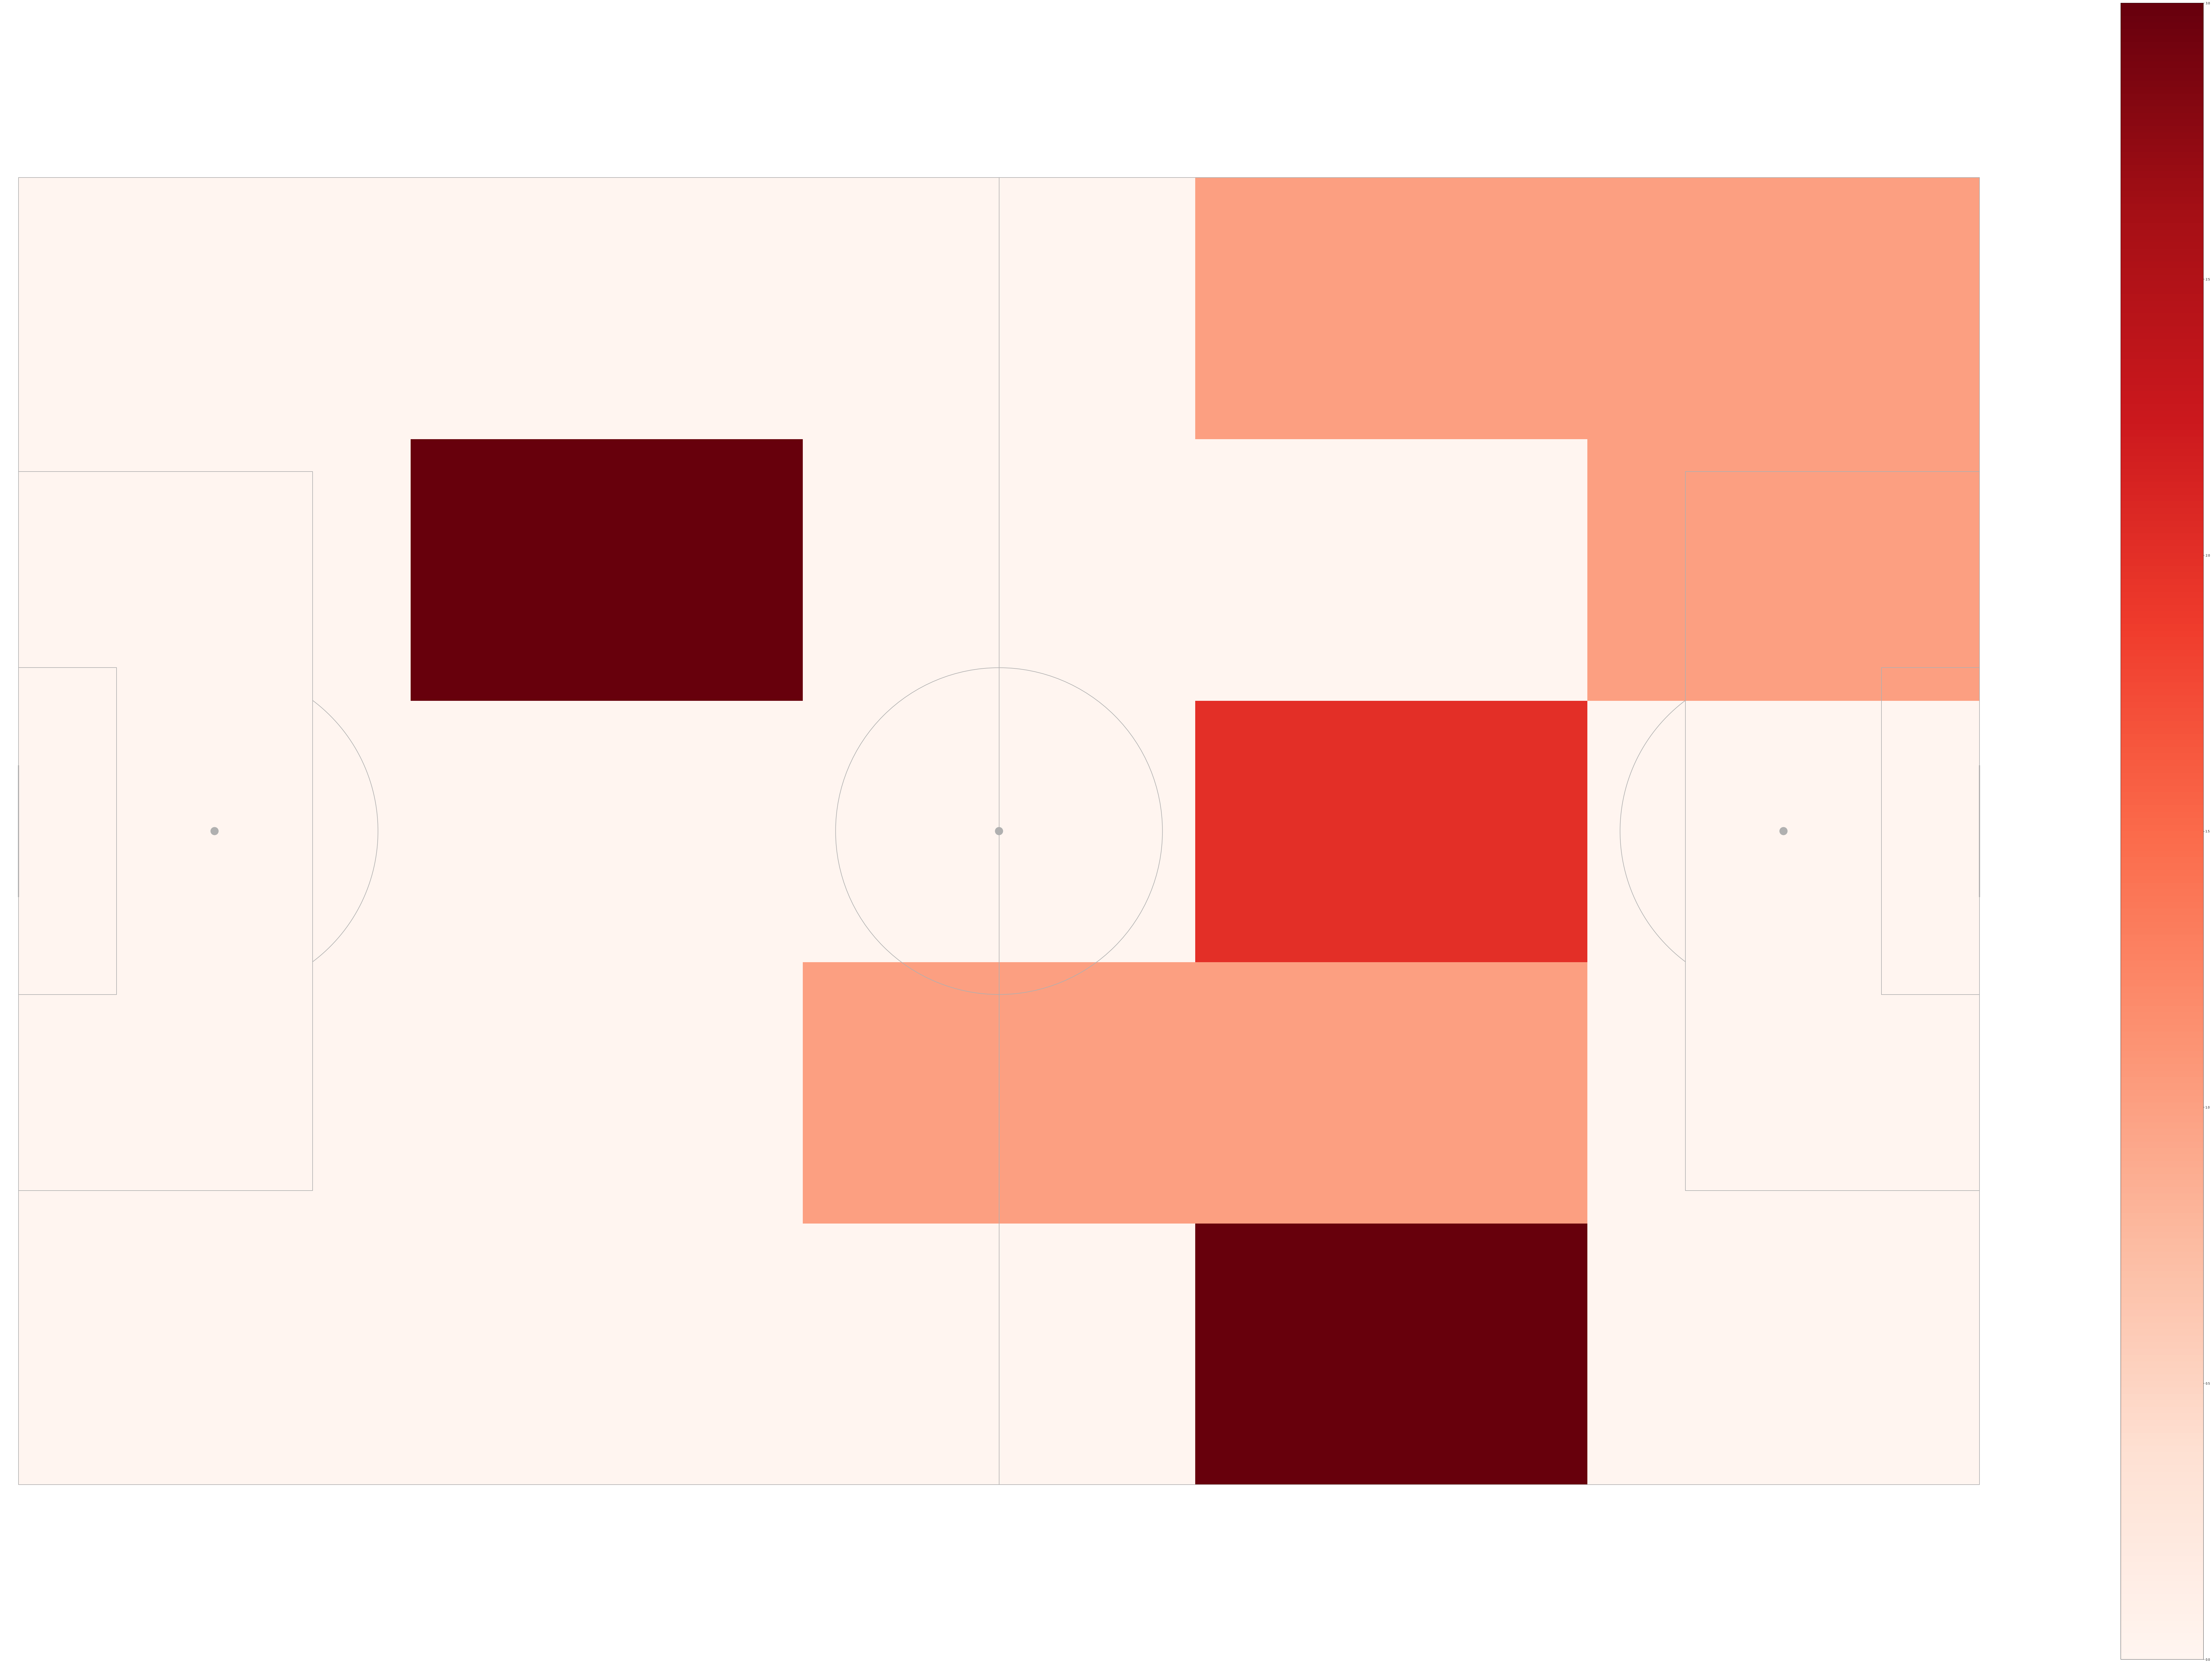

In [32]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthepassthY,'yards','gray')
for i,thepass in Mdanger_passes.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('dangerous passes made by ' + team_required_02)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + team_required_02 + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in Mdanger_passes.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Dangerous passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Let's explor the player who made highest pass number :                                                                                                                                                                      

In [33]:
for ic,match_id in enumerate(match_id_required):
    
    player_required = 'Xavier Hernández Creus'
    
    #Load in all match events 
    
    player_actions = (bar_vs_manu[bar_vs_manu['player']==player_required])
    
    
    #A dataframe of passes
    passes_player = player_actions[player_actions['type'] == 'Pass'].set_index('id')
    #A dataframe of shots
    shots_player = player_actions[player_actions['type'] == 'Shot'].set_index('id')
    
    #Find shot times in seconds
    #This should be adjusted to account for overlapping halves of the match.
    shot_times = shots_player['minute']*60+shots_player['second']
    pass_times = passes_player['minute']*60+passes_player['second']
    
    shot_window = 15  
    shot_start = shot_times - shot_window
    
    
    #Check with passes are whitin [shot_window] seconds of a shot
    #Idea from this code came from https://stackoverflow.com/questions/38201057/efficiently-check-if-value-is-present-in-any-of-given-ranges
    def in_range(pass_time,start,finish):
        return (True in ((start < pass_time) & (pass_time < finish)).unique())

    pass_to_shot = pass_times.apply(lambda x: in_range(x,shot_start,shot_times))
    
    #Exclude corners
    iscorner = passes_player['pass_type']=='Corner'
    
    danger_passes=passes_player[np.logical_and(pass_to_shot,np.logical_not(iscorner))]
    
    if ic==0:
        passes =  danger_passes
    else:
        passes = passes.append(danger_passes)

    
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of passes are: ' + str(len(passes_player)))
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of Dangerous passes are: ' + str(len(danger_passes)))

Match: 18236: Xavier Hernández Creus The Number of passes are: 151
Match: 18236: Xavier Hernández Creus The Number of Dangerous passes are: 1


### Plotting the dangerous  pass location and heatmap made by the player

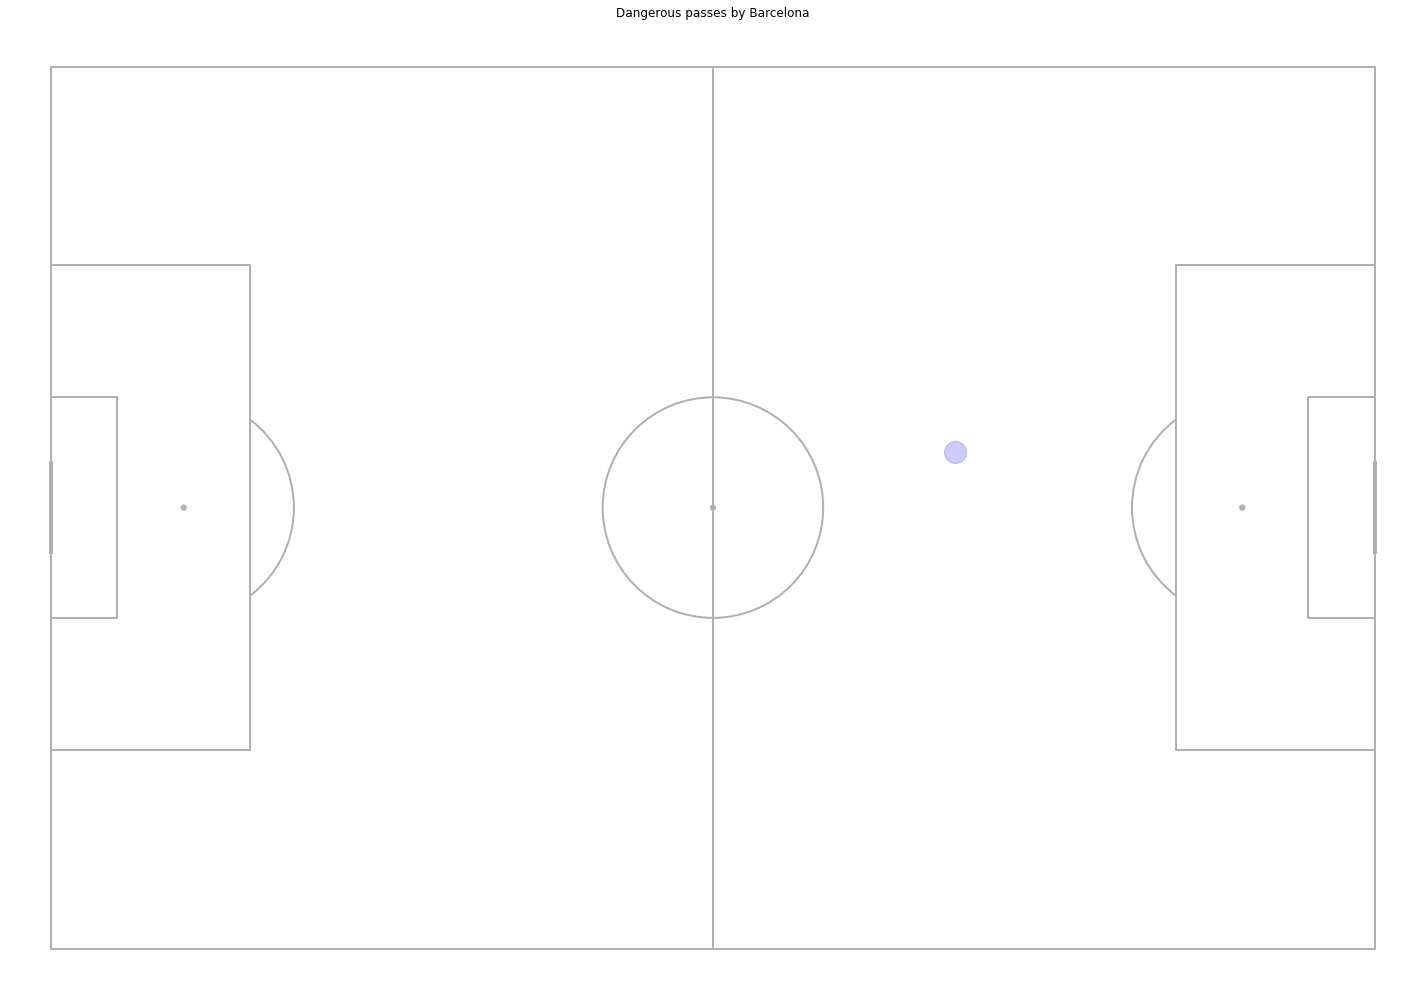

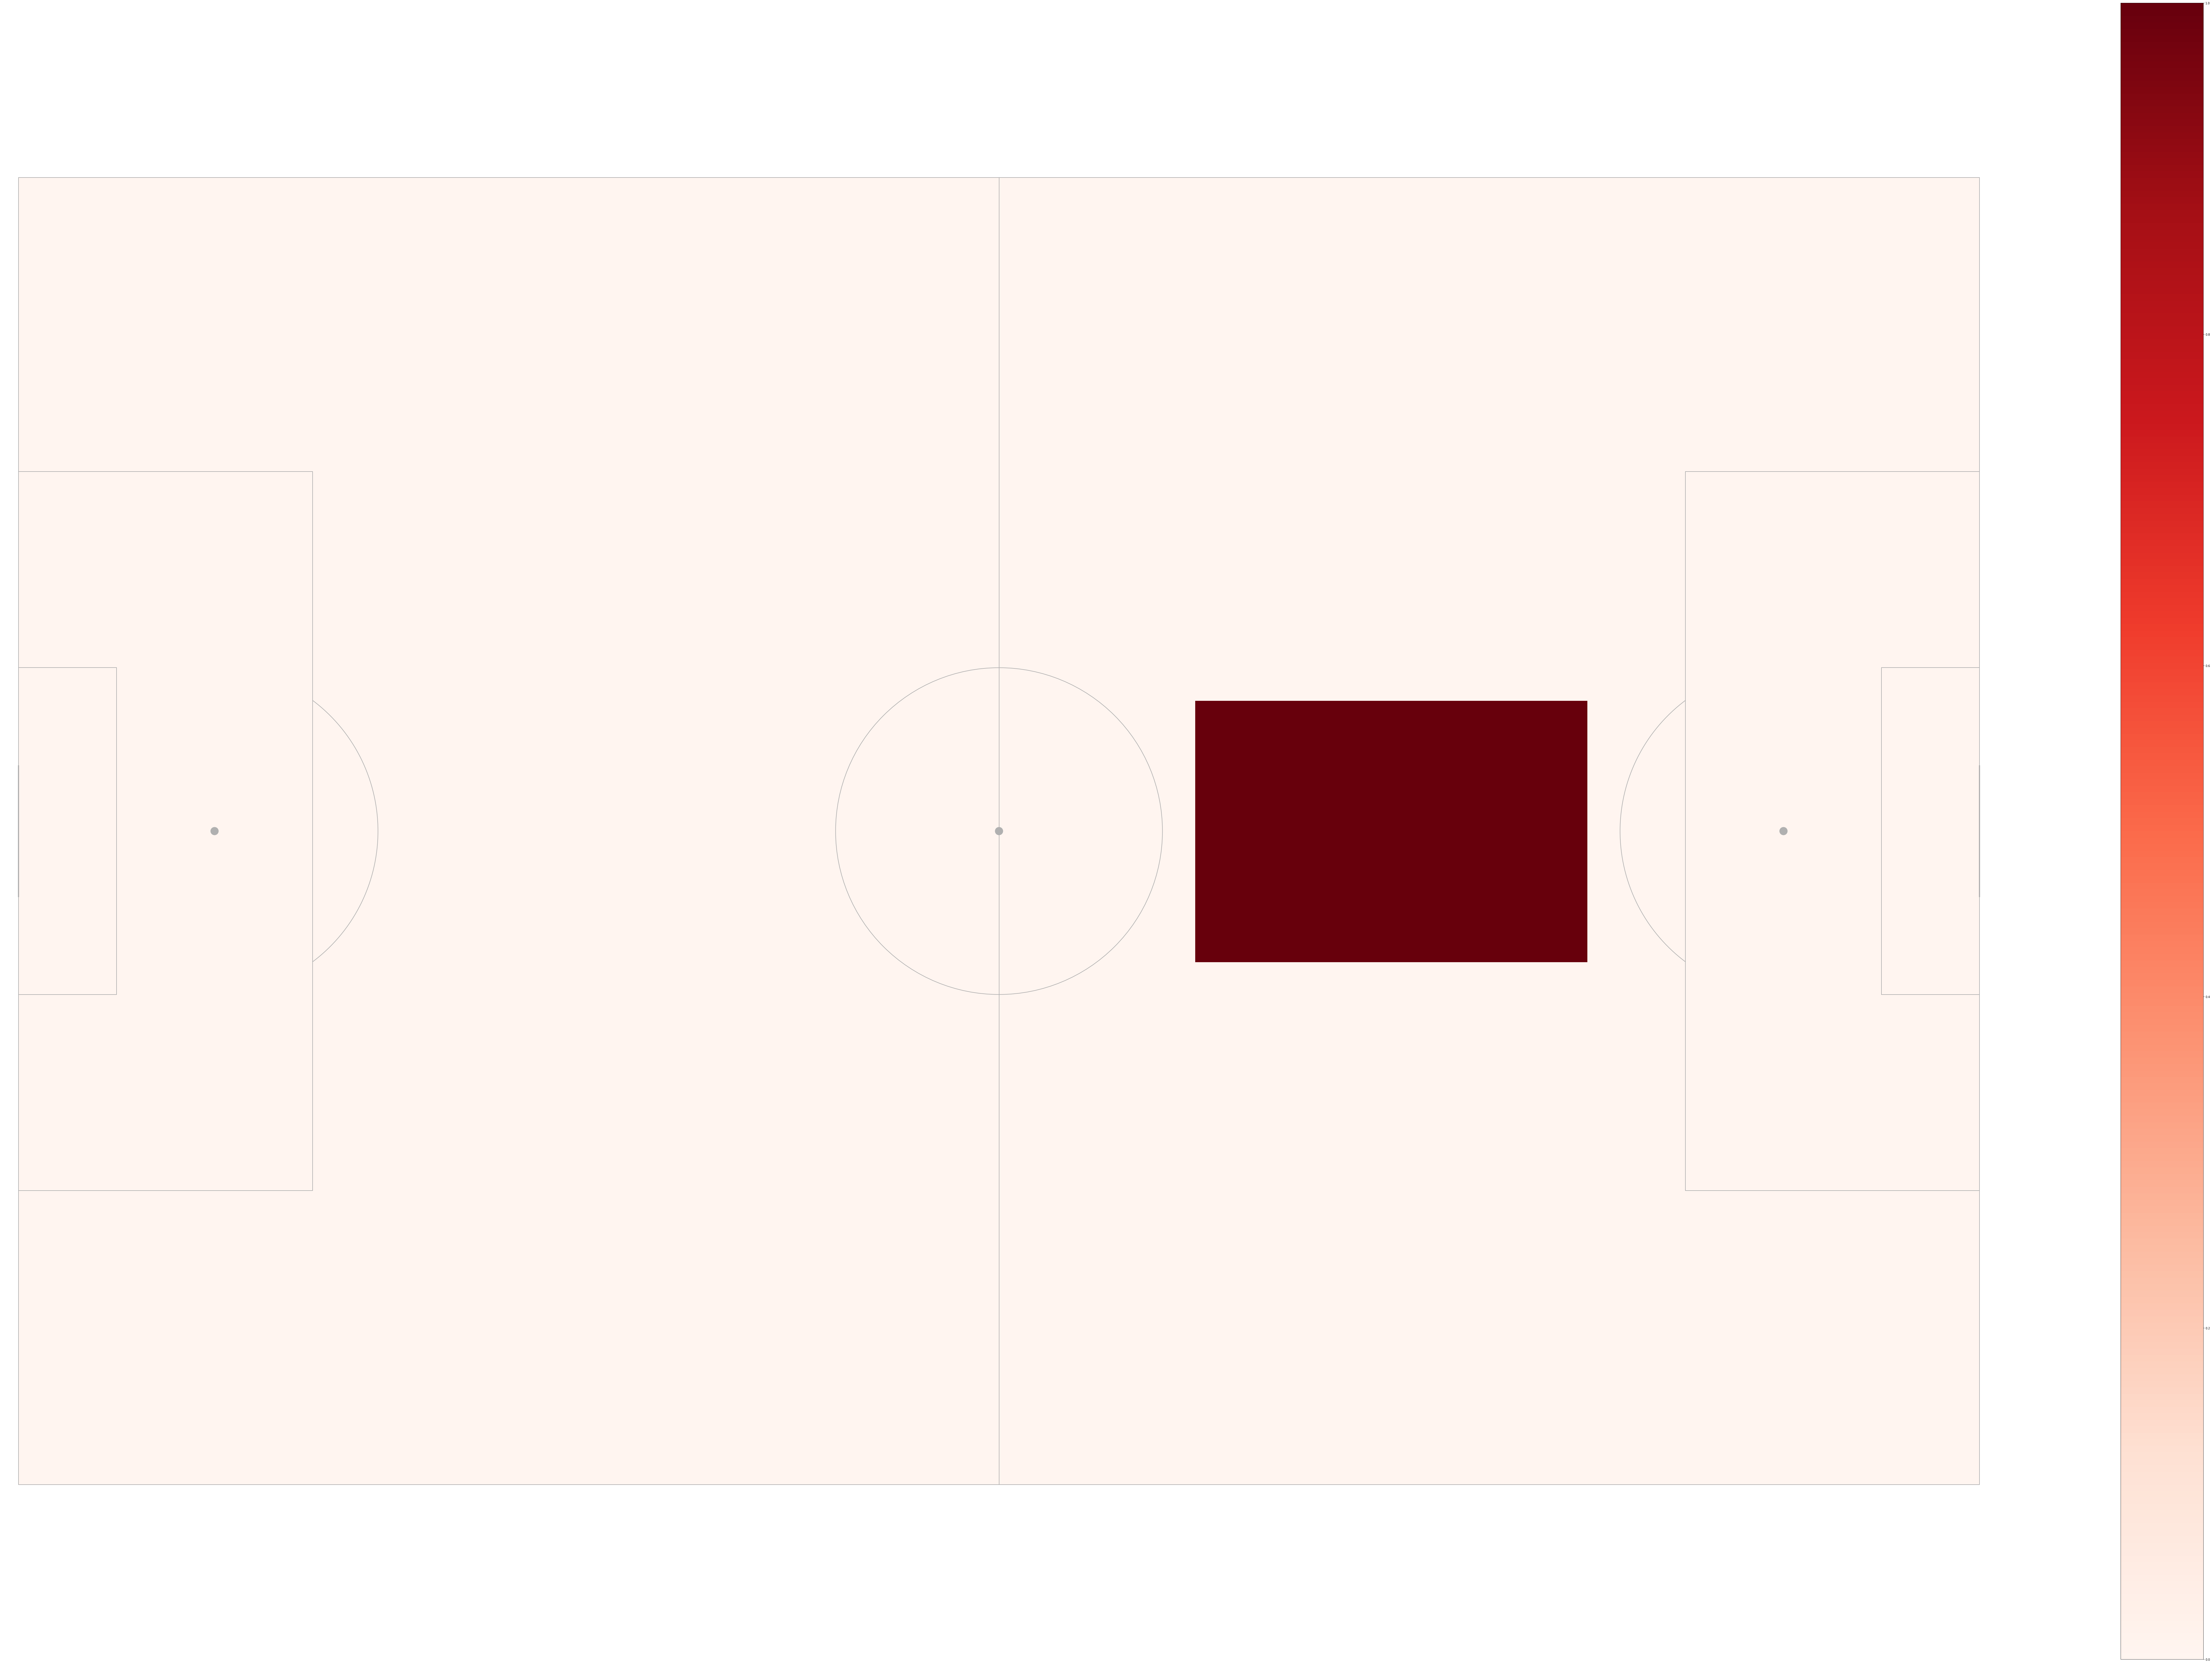

In [34]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('Dangerous passes by ' + team_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + team_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in passes.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
#ax.set_title('Dangerous passes per match by ' + team_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### All the passes & shots made by Player 

In [35]:
for ic,match_id in enumerate(match_id_required):
    
    player_required = 'Xavier Hernández Creus'
    
    #Load in all match events 
    
    player_actions = (bar_vs_manu[bar_vs_manu['player']==player_required])
    
    #A dataframe of passes
    passes_player = player_actions[player_actions['type'] == 'Pass'].set_index('id')
    number_passes = passes_player['type'].count().sum()
    
    # dataframe of shots
    shots_player = player_actions[player_actions['type'] == 'Shot'].set_index('id')
    number_shots = shots_player['type'].count().sum()

    
    
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of passes are: ' + str(len(passes_player)))
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of shots are: ' + str(len(shots_player)))

Match: 18236: Xavier Hernández Creus The Number of passes are: 151
Match: 18236: Xavier Hernández Creus The Number of shots are: 3


## Plotting the passes location & heat map made by the player

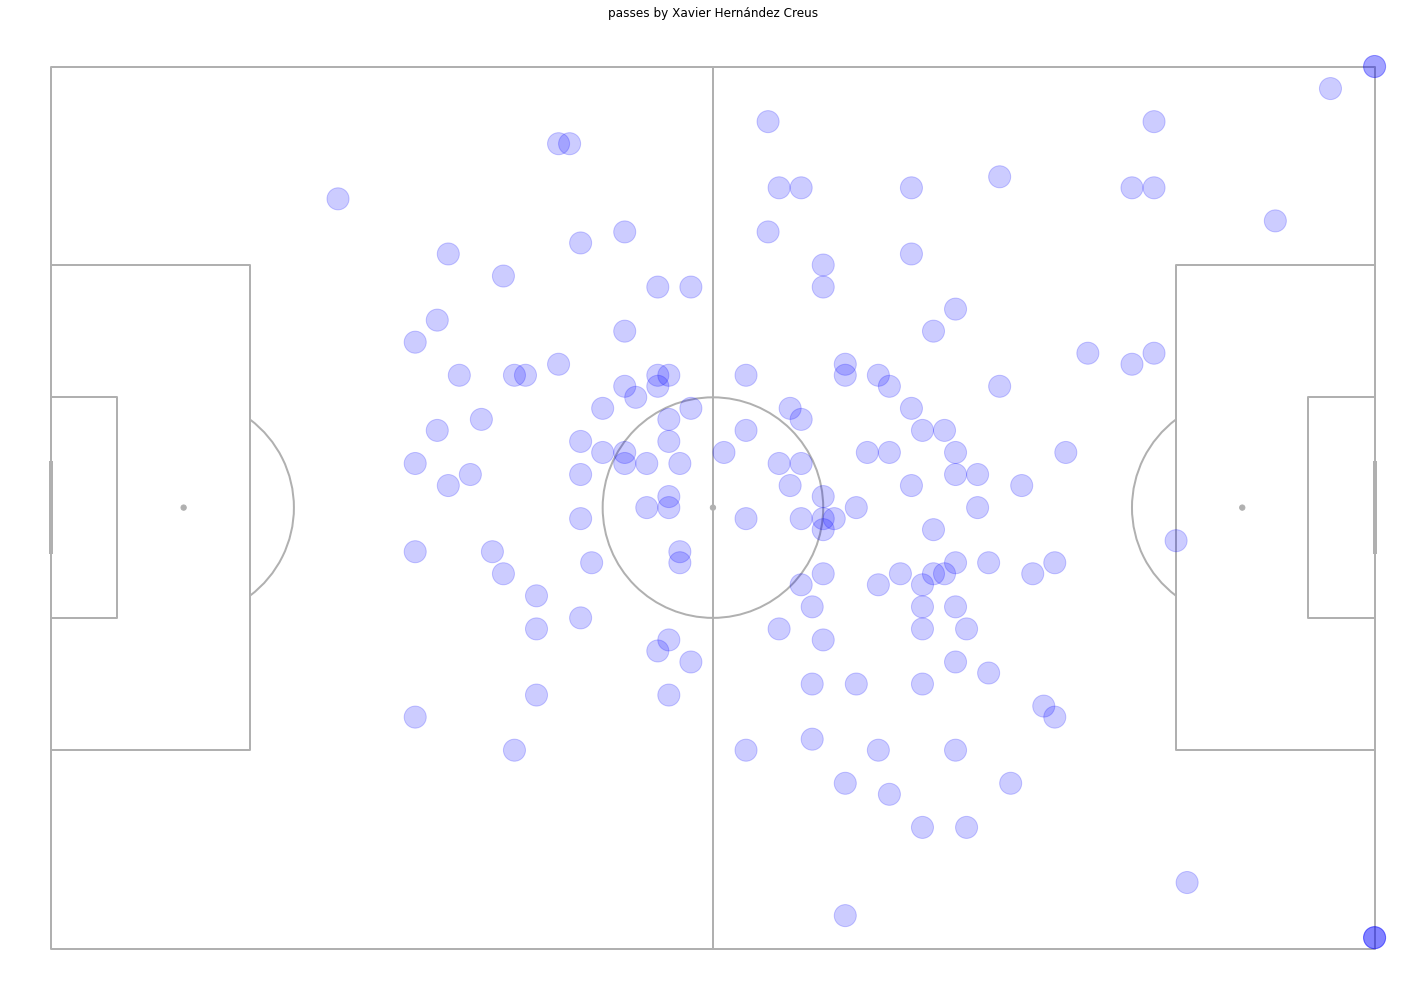

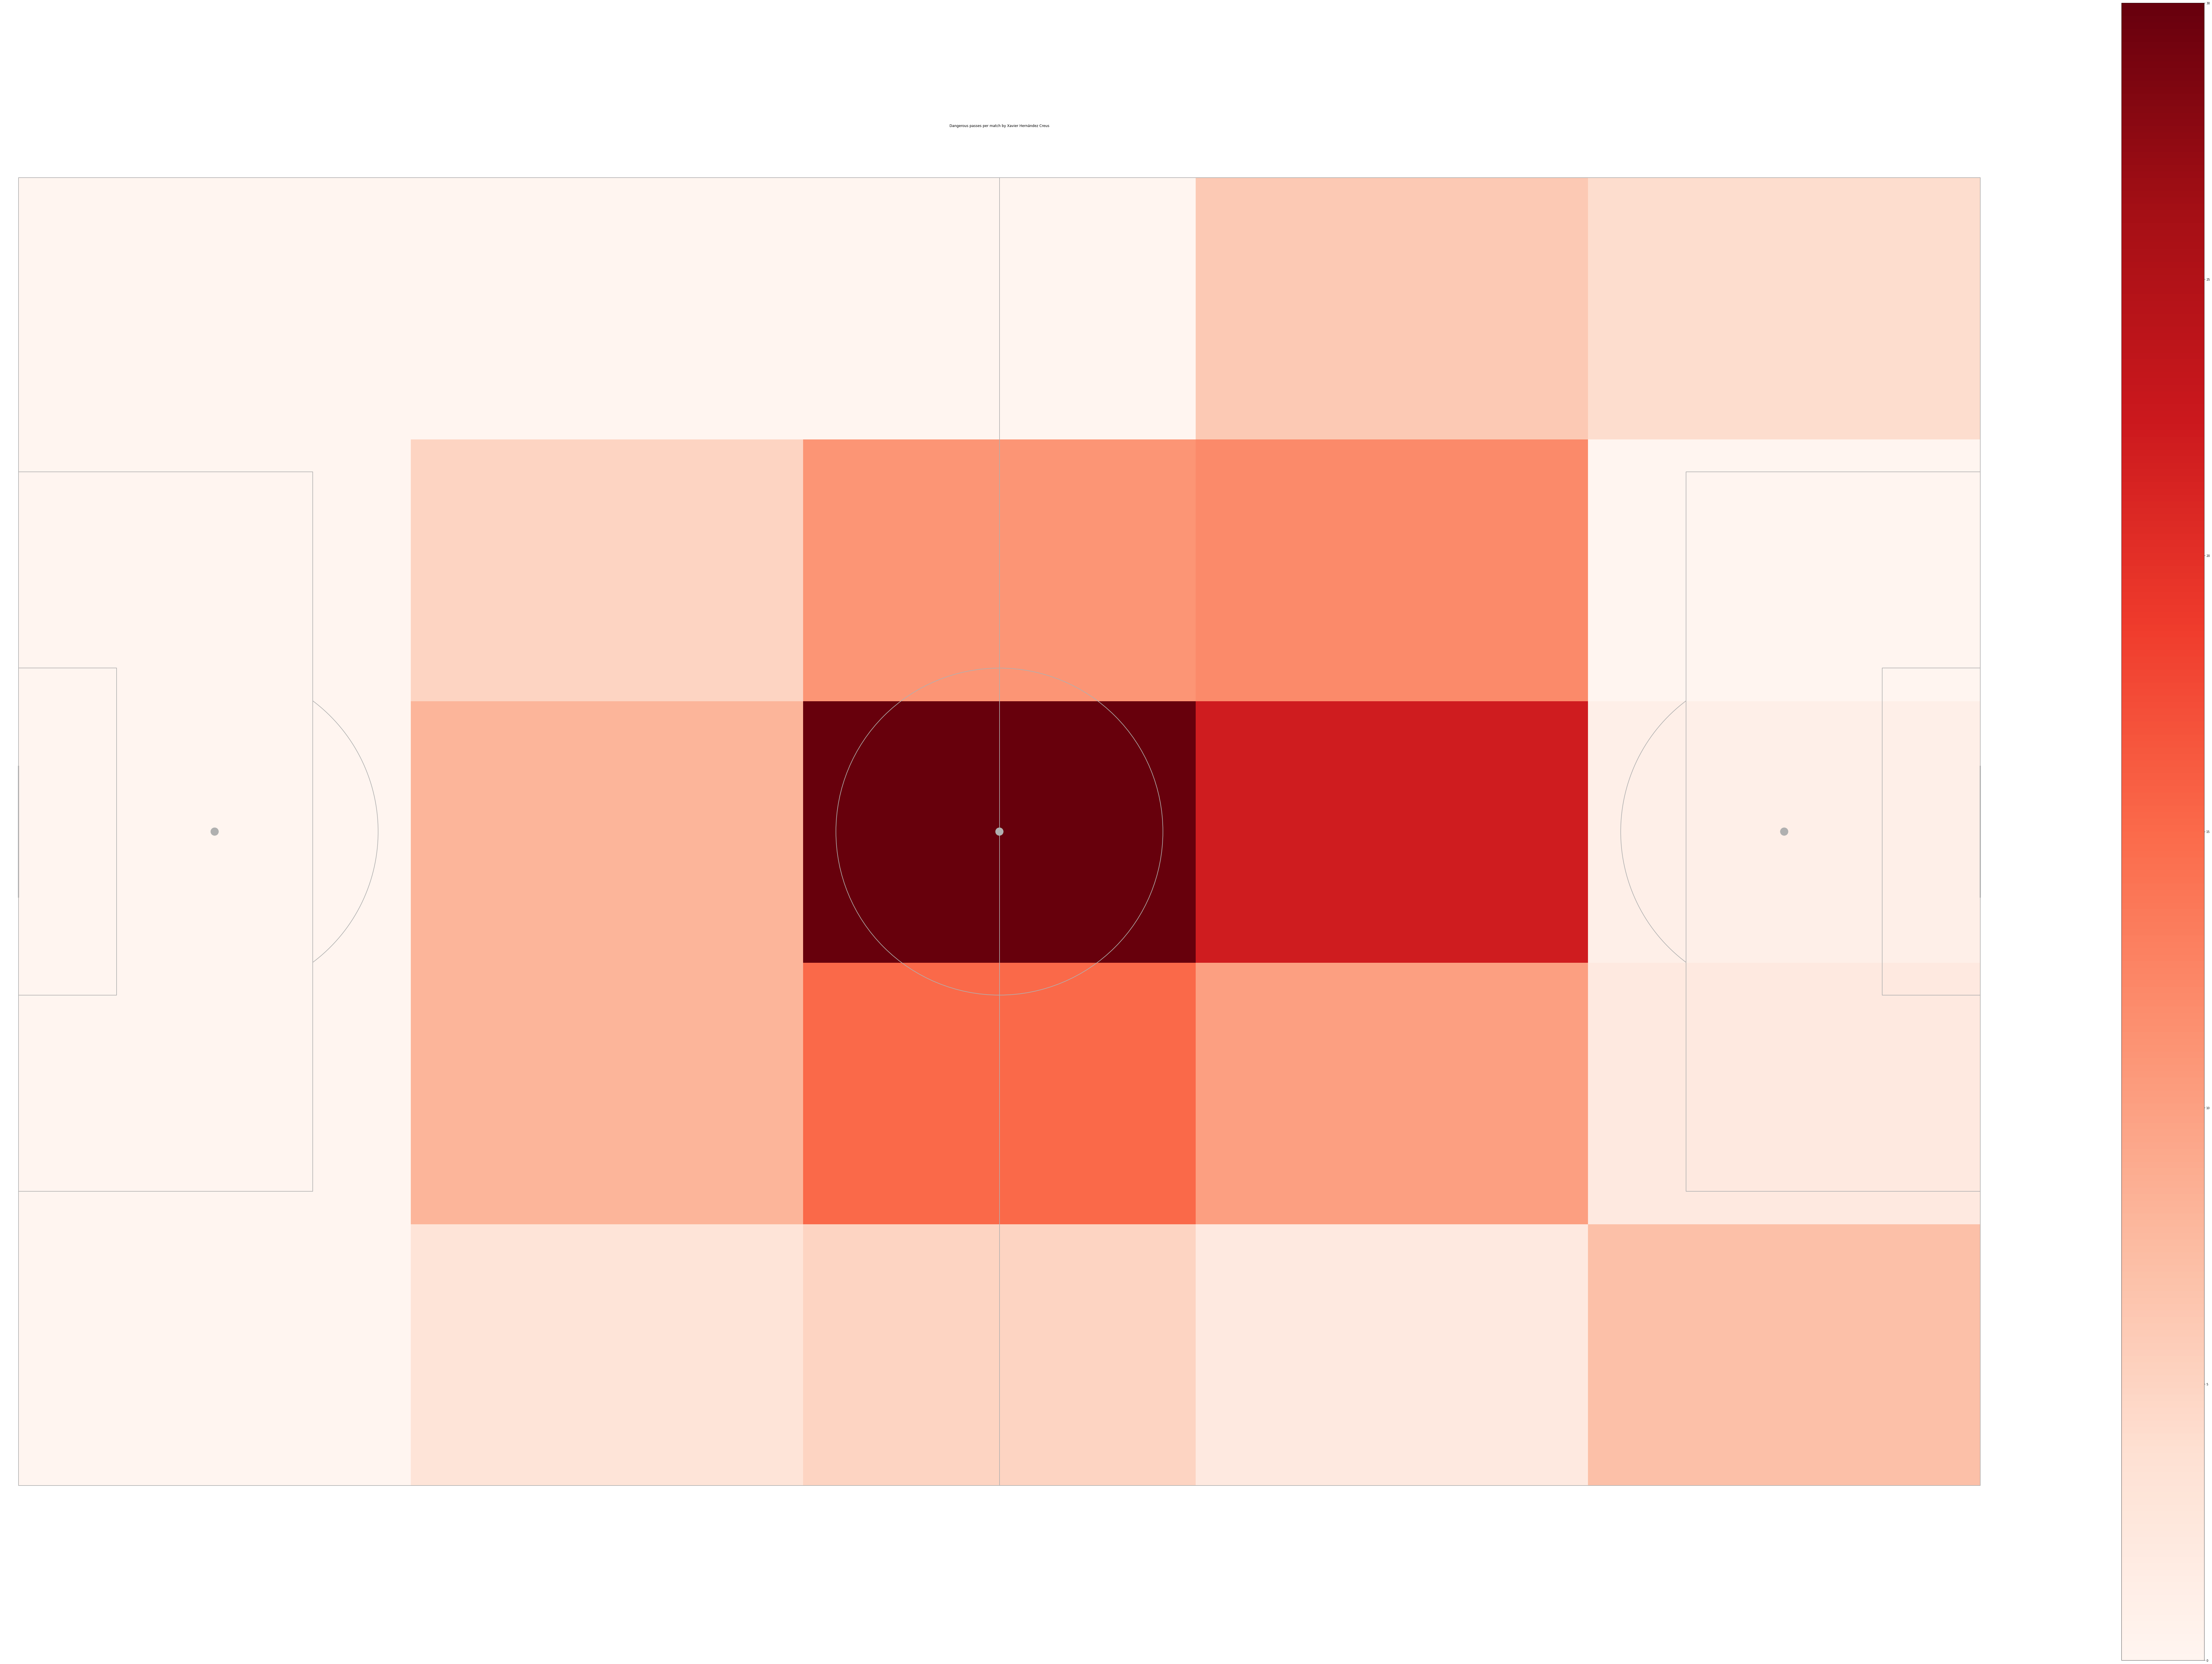

In [36]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes_player.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('passes by ' + player_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + player_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in passes_player.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Dangerous passes per match by ' + player_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Passes/Shots made under pressure

In [37]:
for ic,match_id in enumerate(match_id_required):
    
    player_required = 'Xavier Hernández Creus'
    
    #Load in all match events 
    
    player_actions = (bar_vs_manu[bar_vs_manu['player']==player_required])
    
    #A dataframe of passes
    passes_under_pressure = player_actions.loc[(player_actions['type'] == 'Pass') & (player_actions['under_pressure'] == True)] .set_index('id')
    number_passes = passes_under_pressure['type'].count().sum()
    
    # dataframe of shots
    shots_under_pressure = player_actions.loc[(player_actions['type'] == 'Shot') & (player_actions['under_pressure'] == True)].set_index('id')
    number_shots = shots_under_pressure['type'].count().sum()

    
    
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of passes under pressure are: ' + str(len(passes_under_pressure)))
    print('Match: ' + str(match_id) +': '+ player_required +' The Number of shots are: ' + str(len(shots_under_pressure)))


Match: 18236: Xavier Hernández Creus The Number of passes under pressure are: 21
Match: 18236: Xavier Hernández Creus The Number of shots are: 1


## Plotting all the passes made under pressure

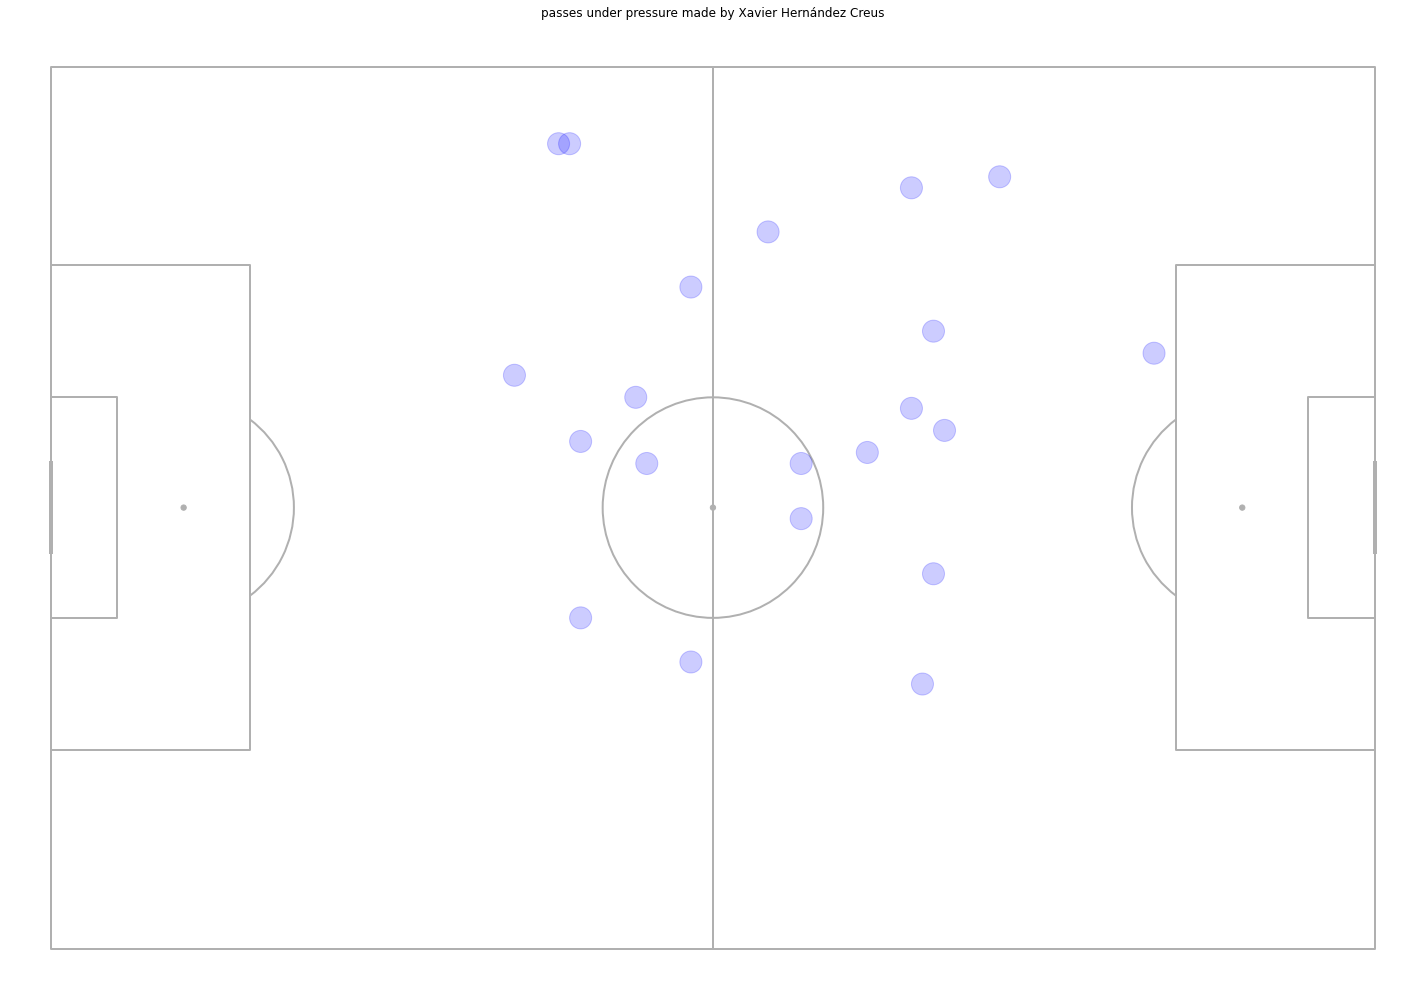

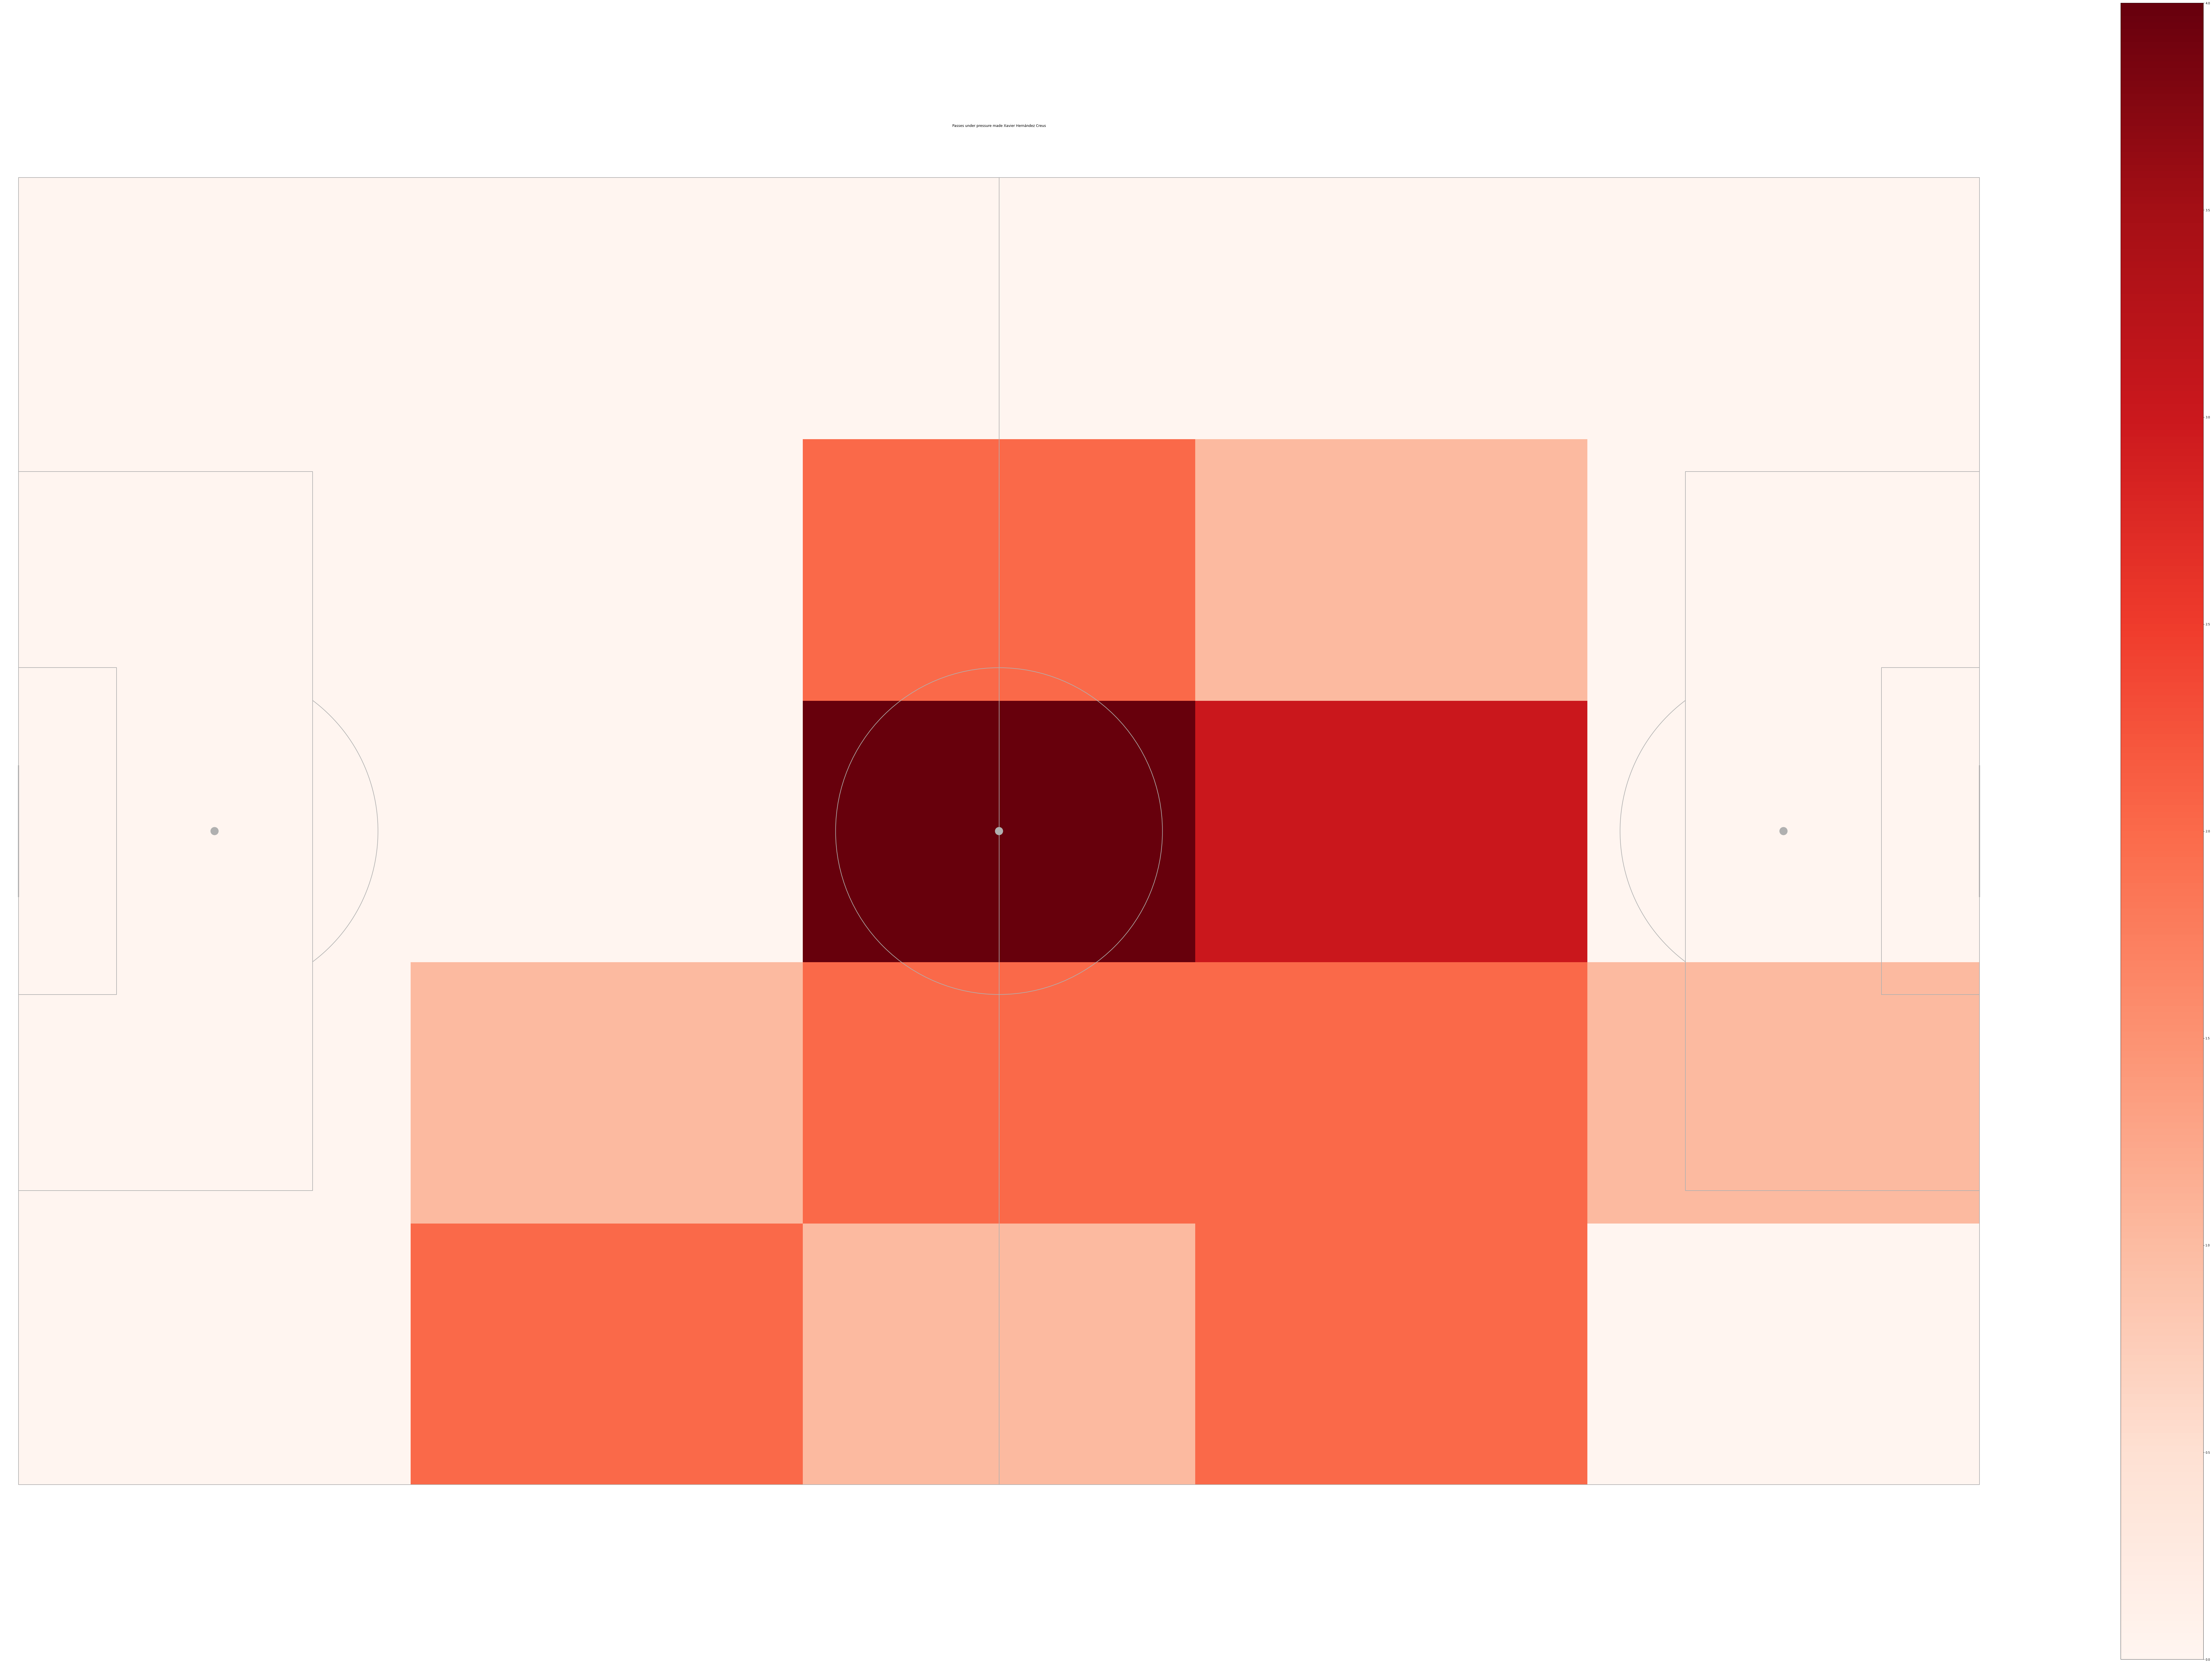

In [38]:
#Set number of matches
number_of_matches=ic+1

#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))


#Plot the passes
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')
for i,thepass in passes_under_pressure.iterrows():
    x=thepass['location'][0]
    y=pitchWidthY-thepass['location'][1]
    passCircle=plt.Circle((x,y),1,color="blue")      
    passCircle.set_alpha(.2)   
    ax.add_patch(passCircle)

ax.set_title('passes under pressure made by ' + player_required)
fig.set_size_inches(20, 14)
fig.savefig('PassesBy' + player_required + '.pdf', dpi=100) 
plt.show()

#Make x,y positions
x=[]
y=[]
for i,apass in passes_under_pressure.iterrows():
    x.append(apass['location'][0])
    y.append(pitchWidthY-apass['location'][1])

#Make a histogram of passes
H_Pass=np.histogram2d(y, x,bins=5,range=[[0, pitchWidthY],[0, pitchLengthX]])


(fig, ax )= pitch.draw(figsize=(pitchLengthX, pitchWidthY))
#(fig,ax) = createPitch(pitchLengthX,pitchWidthY,'yards','gray')

pos=ax.imshow(H_Pass[0]/number_of_matches, extent=[0,120,0,80], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Passes under pressure made ' + player_required)
plt.xlim((-1,121))
plt.ylim((83,-3))
plt.tight_layout()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

C:\Users\anass.harbouli\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


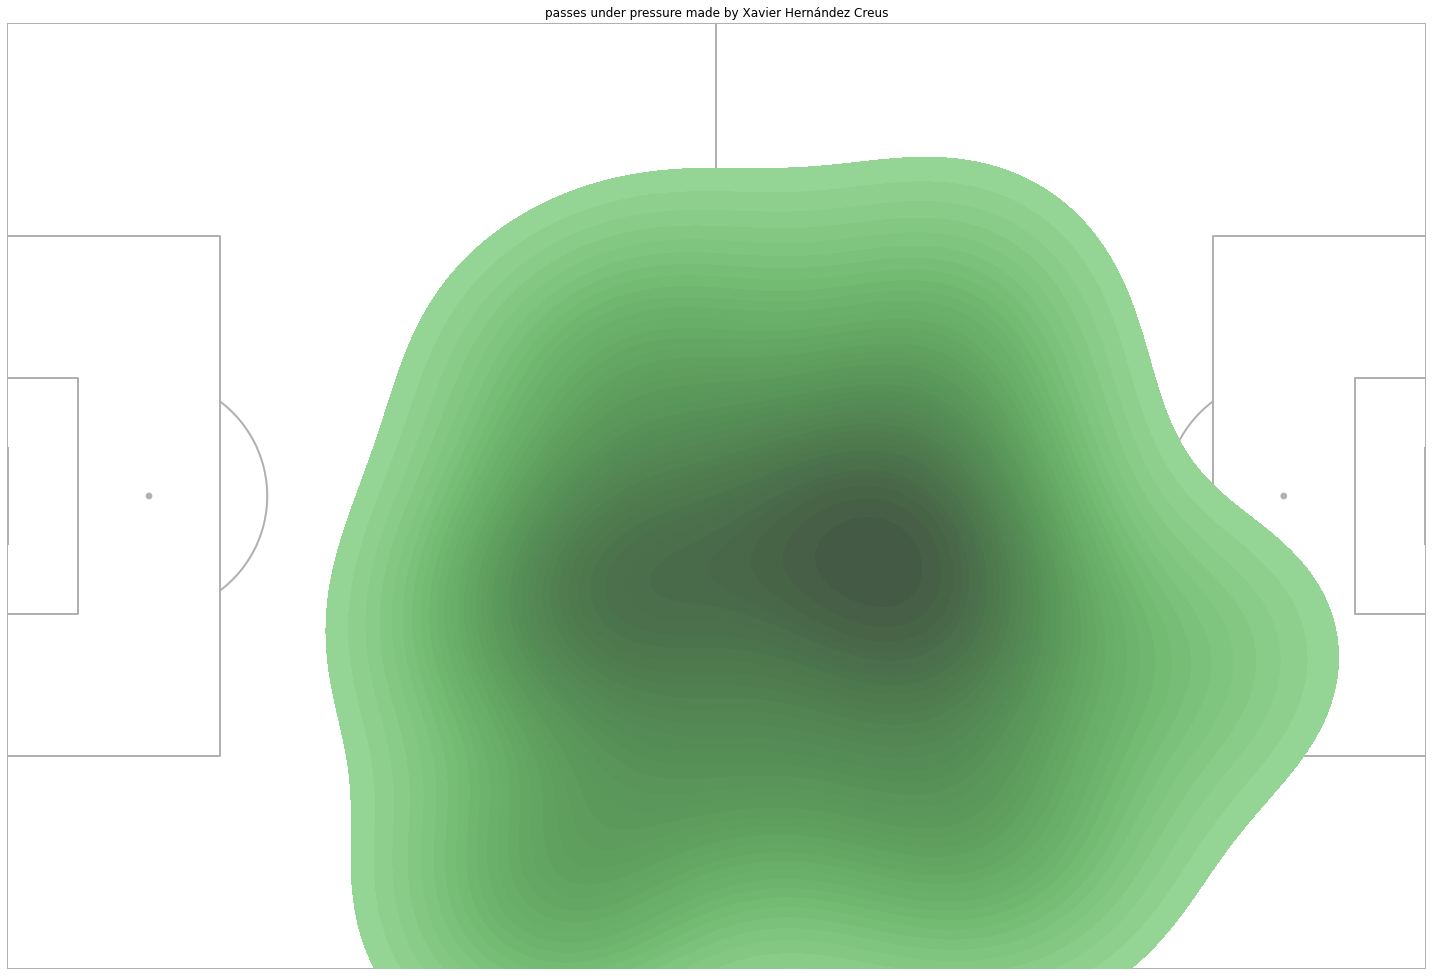

In [39]:
#Create figure
data = player_actions.loc[(player_actions['type'] == 'Pass') & (player_actions['under_pressure'] == True)]

Xstart=[]
Ystart=[]
for i,apass in data.iterrows():
    Xstart.append(apass['location'][0])
    Ystart.append(pitchWidthY-apass['location'][1])


#Size of the pitch in yards (!!!)
pitchLengthX=120
pitchWidthY=80

pitch = Pitch()
# specifying figure size (width, height)
(fig, ax) = pitch.draw(figsize=(pitchLengthX, pitchWidthY))



#Tidy Axes
plt.axis('off')

sns.kdeplot(Xstart,Ystart, shade=True,n_levels=40, color = 'lightgreen')
plt.ylim(0, 80)
plt.xlim(0, 120)

ax.set_title('passes under pressure made by ' + player_required)
fig.set_size_inches(20, 14)

#Display Pitch
plt.show()

### Let's focus on the shoot now :

In [40]:
shots = bar_vs_manu[bar_vs_manu['type'] == 'Shot']
shots

,bad_behaviour_card,ball_receipt_outcome,ball_recovery_offensive,ball_recovery_recovery_failure,block_save_block,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
4171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.042441,Normal,Open Play,NaN,NaN,NaN,Manchester United,00:02:47.553,Shot,NaN
4172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.036080,Normal,Open Play,NaN,NaN,NaN,Barcelona,00:10:05.546,Shot,NaN
4173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.038749,Normal,Open Play,NaN,NaN,NaN,Barcelona,00:10:19.689,Shot,NaN
4174,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.236409,Half Volley,Open Play,NaN,NaN,NaN,Barcelona,00:15:06.226,Shot,NaN
4175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.048522,Normal,Open Play,NaN,NaN,NaN,Barcelona,00:19:19.363,Shot,NaN
4176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.064983,Normal,Open Play,NaN,NaN,NaN,Barcelona,00:20:41.293,Shot,NaN
4177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.107624,Normal,Open Play,NaN,NaN,NaN,Barcelona,00:26:51.994,Shot,NaN
4178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.015777,Normal,Open Play,NaN,NaN,NaN,Barcelona,00:29:00.275,Shot,NaN
4179,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.292454,Normal,Open Play,NaN,NaN,NaN,Manchester United,00:33:05.888,Shot,NaN
4180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.020018,Normal,Open Play,NaN,NaN,NaN,Barcelona,00:36:12.018,Shot,NaN


### Let's plot the shots map for the two teams


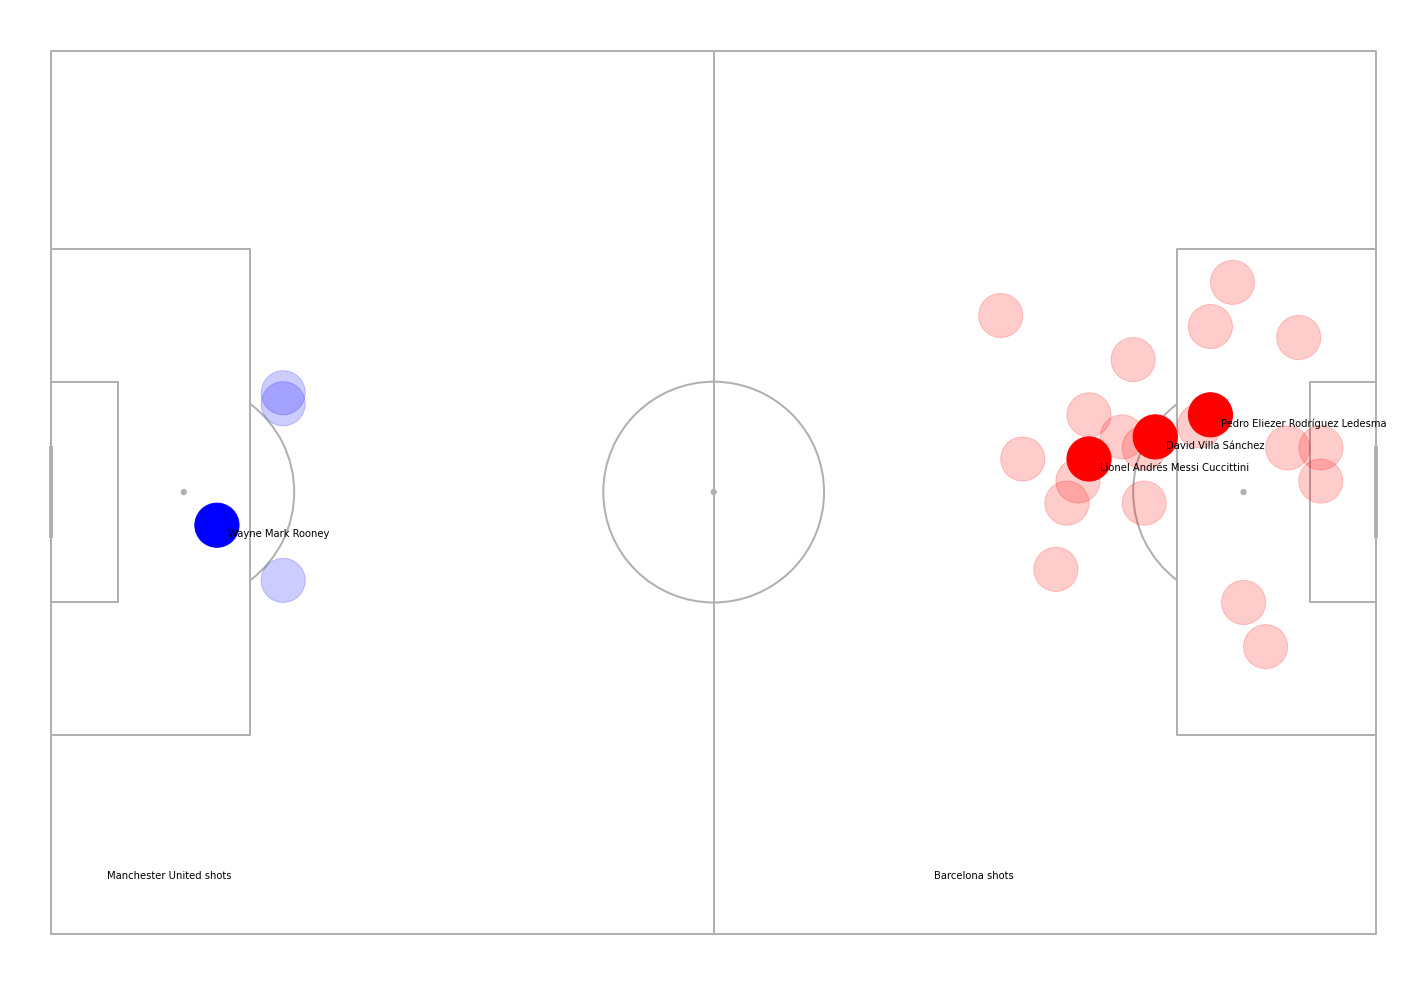

In [41]:
pitchLengthX=120
pitchWidthY=8


home_team_required ="Barcelona"
away_team_required ="Manchester United"


pitch = Pitch()
fig, ax = pitch.draw(figsize=(120, 80))
    
for i,shott in shots.iterrows():
    pitchLengthX=120
    pitchWidthY=80
    goal=shott['shot_outcome']=='Goal'
    team_name=shott['team']
    
    circleSize=2
    
    x=shott['location'][0]
    y=shott['location'][1]
    
    
    
    if (team_name==home_team_required):    
    
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            plt.text((x+1),pitchWidthY-y+1,shott['player'])
            
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
            
        ax.add_patch(shotCircle)
    elif (team_name==away_team_required):         
    
        if goal:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue") 
            plt.text((pitchLengthX-x+1),y+1,shott['player'])
        else:
            shotCircle=plt.Circle((pitchLengthX-x,y),circleSize,color="blue")      
            shotCircle.set_alpha(.2)
        ax.add_patch(shotCircle)
          
   
plt.text(5,75,away_team_required + ' shots') 
plt.text(80,75,home_team_required + ' shots') 
     
fig.set_size_inches(20, 14)
 
plt.show()

> shots map one player

In [43]:
bar_vs_manu[bar_vs_manu['type'] == 'Shot']['player'].unique()

array(['Javier Hernández Balcázar', 'David Villa Sánchez',
       'Pedro Eliezer Rodríguez Ledesma', 'Andrés Iniesta Luján',
       'Wayne Mark Rooney', 'Xavier Hernández Creus',
       'Lionel Andrés Messi Cuccittini', 'Daniel Alves da Silva',
       'Luís Carlos Almeida da Cunha', 'Ibrahim Afellay'], dtype=object)

### We will take Player = Pedro Eliezer Rodríguez Ledesma and his XG :

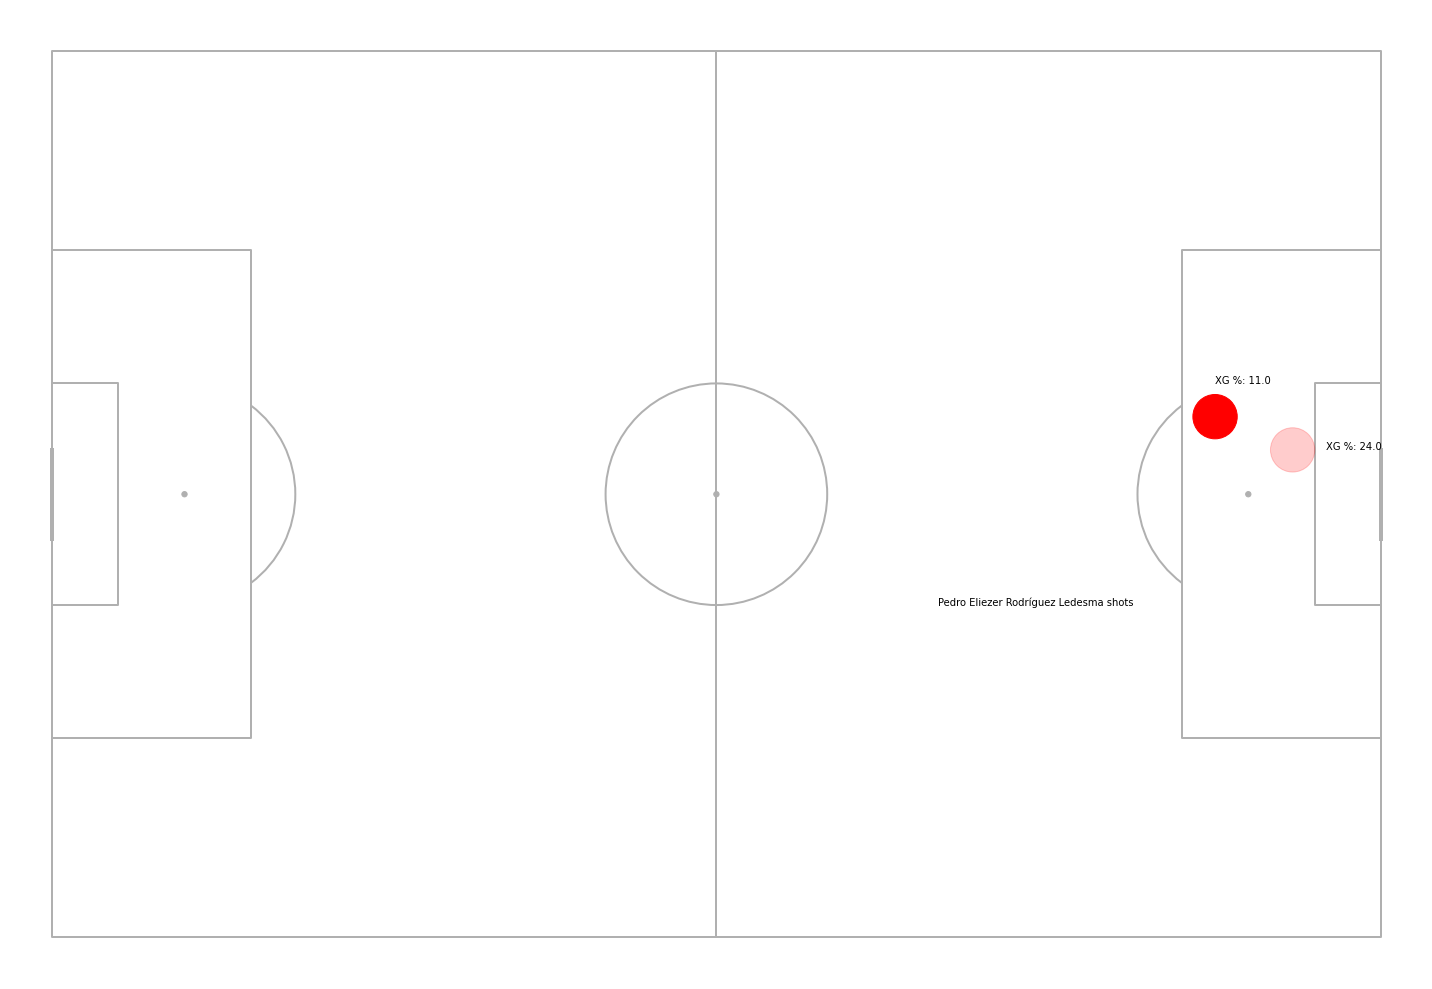

In [53]:


pitchLengthX=120
pitchWidthY=8


home_team_required ="Barcelona"
away_team_required ="Manchester United"


pitch = Pitch()
fig, ax = pitch.draw(figsize=(120, 80))
    
for i,shott in shots.iterrows():
    pitchLengthX=120
    pitchWidthY=80
    goal=shott['shot_outcome']=='Goal'
    team_name=shott['team']
    
    circleSize=2
    
    x=shott['location'][0]
    y=shott['location'][1]
    player = 'Pedro Eliezer Rodríguez Ledesma'
    
    
      
    if  shott['player']== player and shott['team'] == home_team_required:
        if goal:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")
            #plt.text((x+2),pitchWidthY-y,shott['player'])
            plt.text((x),pitchWidthY-y-3,"XG %: "+str(round(shott['shot_statsbomb_xg'],2)*100))
            
        else:
            shotCircle=plt.Circle((x,pitchWidthY-y),circleSize,color="red")     
            shotCircle.set_alpha(.2)
            plt.text((x+3),pitchWidthY-y,"XG %: "+str(round(shott['shot_statsbomb_xg'],2)*100))
            
        ax.add_patch(shotCircle)
            

      
   
plt.text(80,50,player + ' shots') 
     
fig.set_size_inches(20, 14)

plt.show()

> ### We can do a lot more with this dataset depending on the stakeholders' requests, but for now we'll keep it short.

# Thank you